# Indiana Science Standards Analysis  
Analysis for the Indiana Department of Education - By Kristen Davis

# Libraries & Data Packages 
A broad array of libraries and functions that are implemented through the notebook including custom built functions.

In [101]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
#custom functions 
from projectfunctions import * 

In [188]:
#Data Collections
from bs4 import BeautifulSoup 
import requests  
from time import sleep  
import numpy as np 
from random import randint

#Data Analysis 
import pandas as pd
import numpy as np  
np.random.seed(0) 
import pickle 
from itertools import chain 

#Data Visulaization 
import matplotlib.pyplot as plt  
import matplotlib.cm as cm 
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import plotly.express as px 
import plotly.graph_objects as go 
import plotly.figure_factory as ff 
from urllib.request import urlopen
import json  
import seaborn as sns  
from PIL import Image


#Natural Language Processing 
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words("english")
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist 
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.collocations import * 
import string 
import re 
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
import gensim 
from gensim.parsing.preprocessing import preprocess_documents 
import py_stringmatching as sm 
from gensim.models import Word2Vec 
from fuzzywuzzy import fuzz 
from py_stringmatching import MongeElkan, Levenshtein, BagDistance, Jaccard  
from nltk.stem.porter import * 
import scattertext as st
import spacy
from pprint import pprint

#Modeling 
from sklearn.cluster import MiniBatchKMeans, KMeans 
from sklearn.decomposition import PCA  

from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.metrics import calinski_harabasz_score, confusion_matrix 
from sklearn.metrics import classification_report 

from sklearn.datasets import fetch_20newsgroups 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB  
from scipy.spatial.distance import pdist, squareform 
from sklearn.manifold import TSNE 
from collections import defaultdict 
from sklearn.pipeline import make_pipeline 
from sklearn.svm import LinearSVC 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score 
from scipy.cluster.hierarchy import ward, dendrogram 
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.manifold import MDS

# NGSS Standards  
A set of K - 12 Science standards centered around three dimensions: core ideas, practices, and cross cutting concepts. This will be the primary text used in this project and the benchmark used in analysis and comparison.

## Text Processing 
A general text cleaning as well as specific text based word removal.

In [104]:
ngss = open_and_flatten('TXTfiles/ngss')

In [105]:
len(ngss)

41298

In [106]:
#look at the top 50 words on general process ngss  
ngss_generalclean_freqdist = FreqDist(ngss)
ngss_generalclean_freqdist.most_common(10)

[('evidence', 467),
 ('core', 438),
 ('ideas', 415),
 ('energy', 389),
 ('include', 305),
 ('using', 304),
 ('information', 302),
 ('engineering', 299),
 ('use', 296),
 ('data', 292)]

In [189]:
#remove additional stop words
ngss_stopwords_list = ['hs', 'ms', 'ls', 'ess', 'ps', 'state', 'standards', 
                       'permisssion', 'inc', 'september', 'rights reserved', 
                       'ets', 'science', 'rights', 'reserved', 'section', 
                       'entitled', 'marked', 'asterisk', 'science', 'archive', 
                      'preformance', 'expectations', 'assessment', 'boundary',
                       'sciences',  'achieve', 'reproduced', 'verbatium',
                       'reprinted', 'permission', 'ideas verbatium', 'mp',
                       'could', 'grade', 'framework', 'one', 'dcis']
ngss_processed = [word for word in ngss if word not in ngss_stopwords_list] 

#re examine frequency list
ngss_freqdist = FreqDist(ngss_processed)
ngss_top10 = ngss_freqdist.most_common(11)  
print("Top 10 Highest Frequency Words")
ngss_top10

Top 10 Highest Frequency Words


[('evidence', 467),
 ('core', 438),
 ('ideas', 415),
 ('energy', 389),
 ('include', 305),
 ('using', 304),
 ('information', 302),
 ('engineering', 299),
 ('use', 296),
 ('data', 292),
 ('systems', 284)]

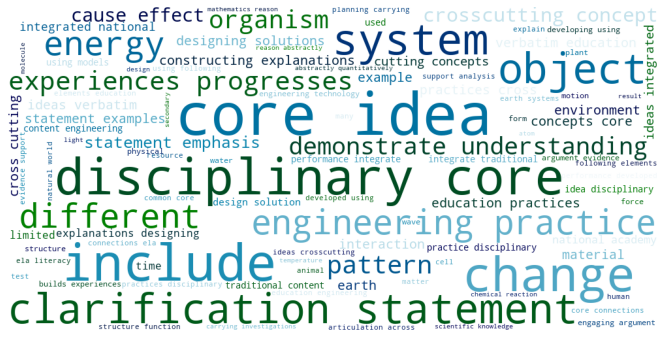

In [199]:
#ngss word cloud 
word_cloud(ngss_processed)

## Word Relationships 
Examine the word relationships within the NGSS corpus. 

In [109]:
#ngss bigram pairs 
print("Bigram Pairs:")
bigram_generator(ngss_processed, 5)

Bigram Pairs:


[(('core', 'ideas'), 0.0073368319152188315),
 (('disciplinary', 'core'), 0.006598053701533602),
 (('clarification', 'statement'), 0.004483619503744841),
 (('experiences', 'progresses'), 0.002904162633107454),
 (('demonstrate', 'understanding'), 0.0025729861924899374)]

In [110]:
#ngss pmi pairs  
print("PMI Pairs:")
pmi_generator(ngss_processed, 100)

PMI Pairs:


[(('clarification', 'statement'), 7.776736275044389),
 (('experiences', 'progresses'), 7.335322976104607),
 (('demonstrate', 'understanding'), 7.2564845884582585),
 (('disciplinary', 'core'), 6.469150278856578),
 (('core', 'ideas'), 5.958722467915493)]

In [111]:
#word ebeddings 
model = gensim.models.Word2Vec([ngss_processed], min_count=100, window=5, 
                               size=150)

- evidence
('scientific', 0.9998186826705933)
('based', 0.9997915029525757)
('multiple', 0.999779462814331)
('model', 0.9997669458389282)
('data', 0.9997454285621643)
('use', 0.9997357130050659)
('natural', 0.9997341632843018)
('specific', 0.9997254610061646)
('support', 0.9997247457504272)
('design', 0.9996926188468933)


- core
('disciplinary', 0.9997736811637878)
('ideas', 0.9997090697288513)
('idea', 0.9996837973594666)
('integrate', 0.9996563792228699)
('education', 0.9996294975280762)
('practices', 0.999579668045044)
('performance', 0.99957674741745)
('concepts', 0.9995226860046387)
('problems', 0.9995091557502747)
('engineering', 0.9994567632675171)


- ideas
('disciplinary', 0.9998058080673218)
('idea', 0.9997430443763733)
('performance', 0.9997353553771973)
('core', 0.9997090697288513)
('education', 0.9996929168701172)
('concepts', 0.9996918439865112)
('practices', 0.9996834993362427)
('engineering', 0.9996787905693054)
('problems', 0.9996462464332581)
('integrate', 0.99958622

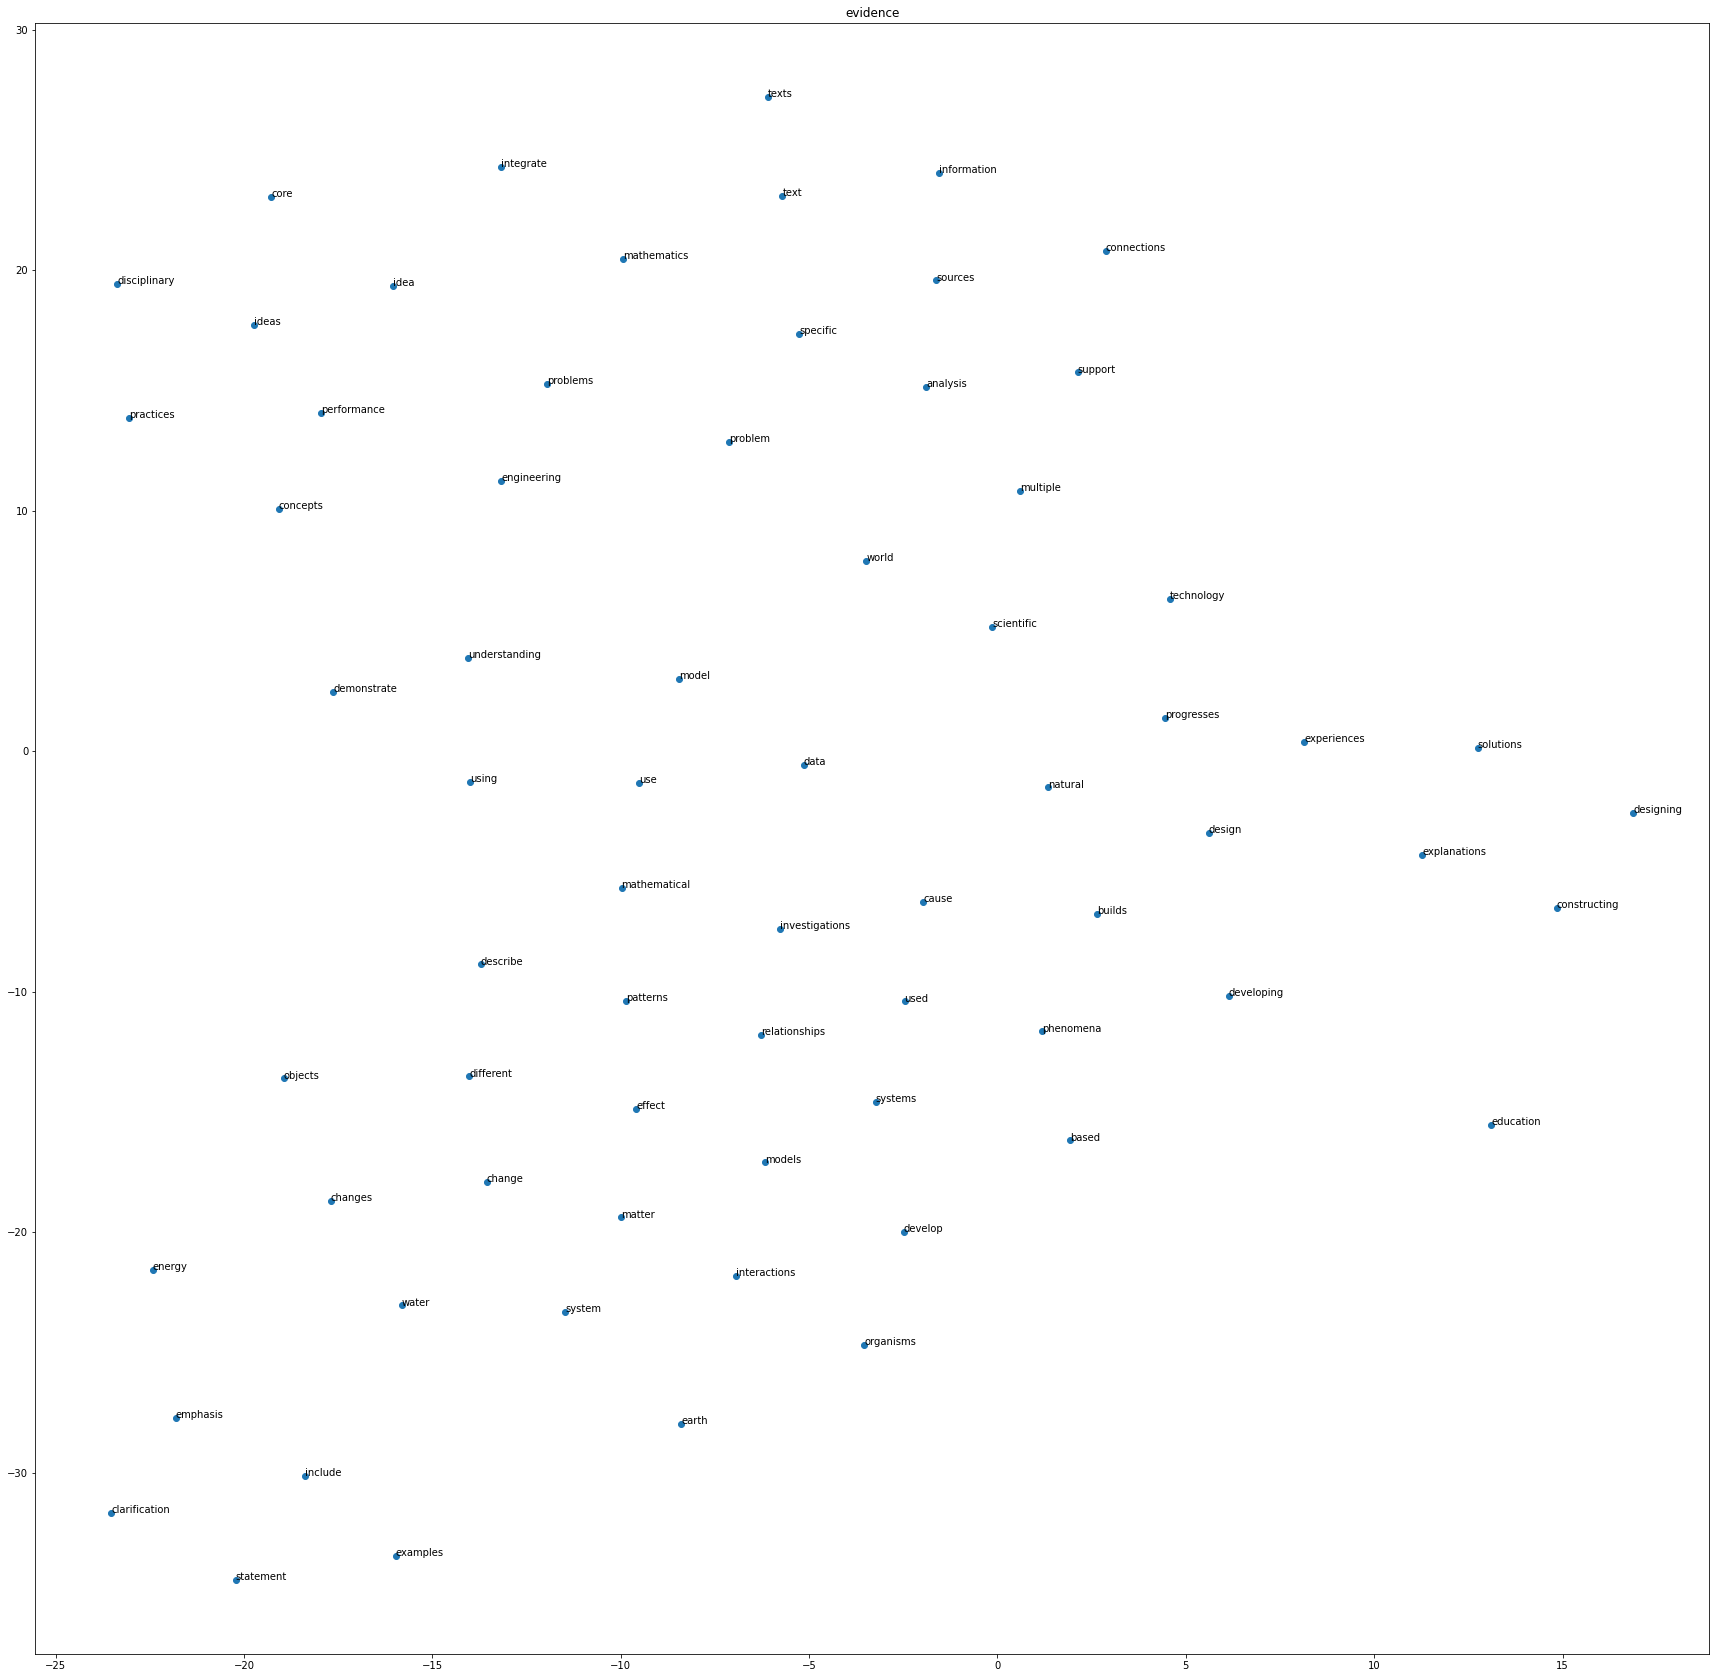

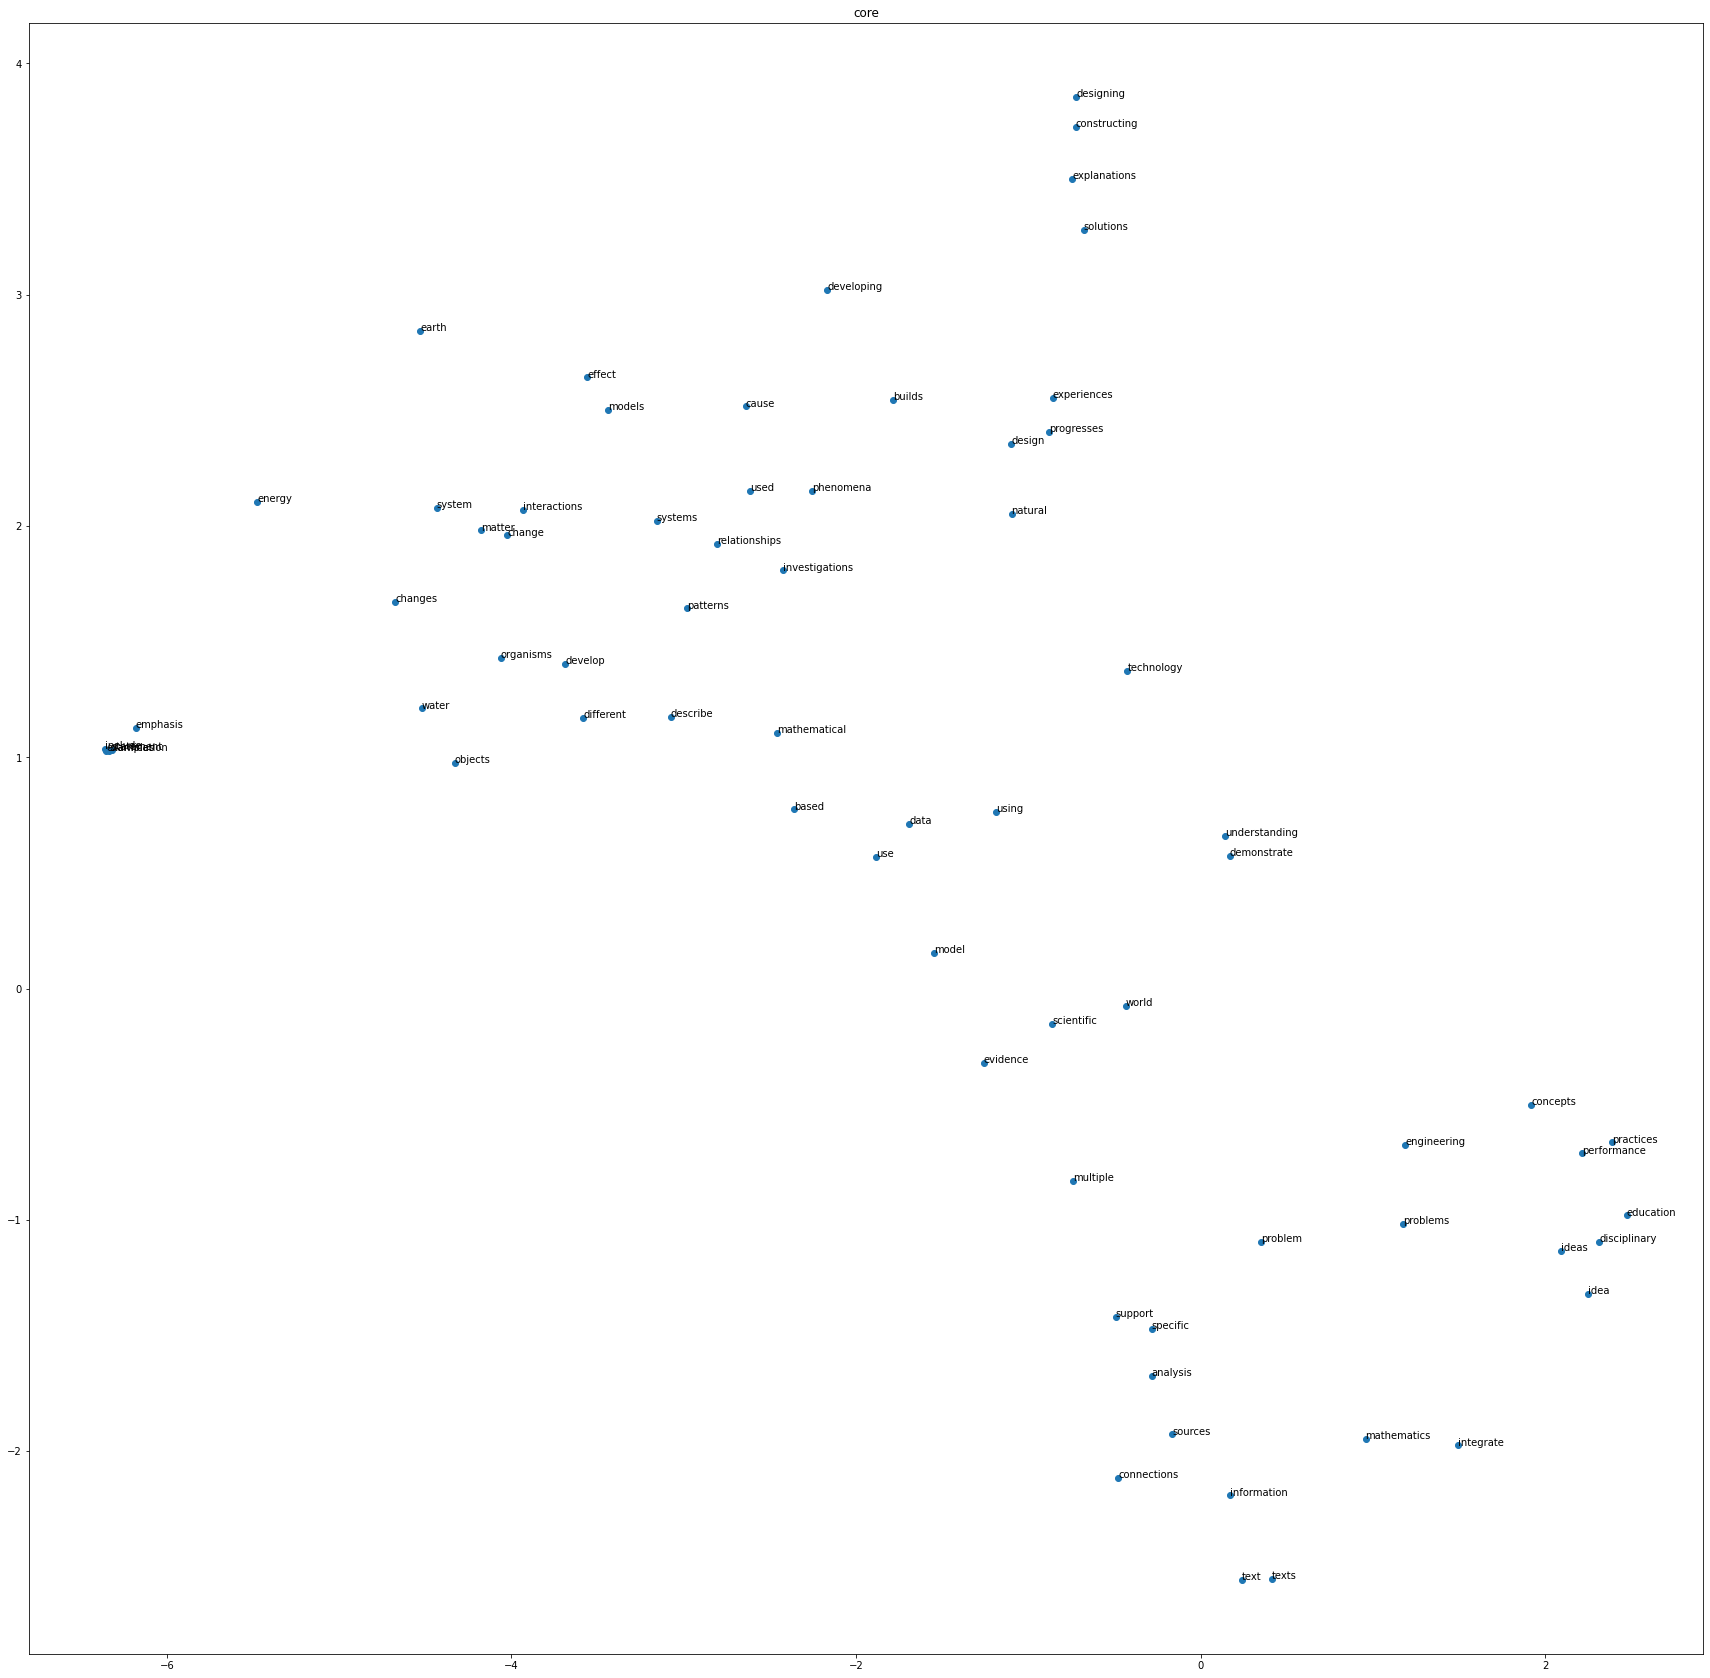

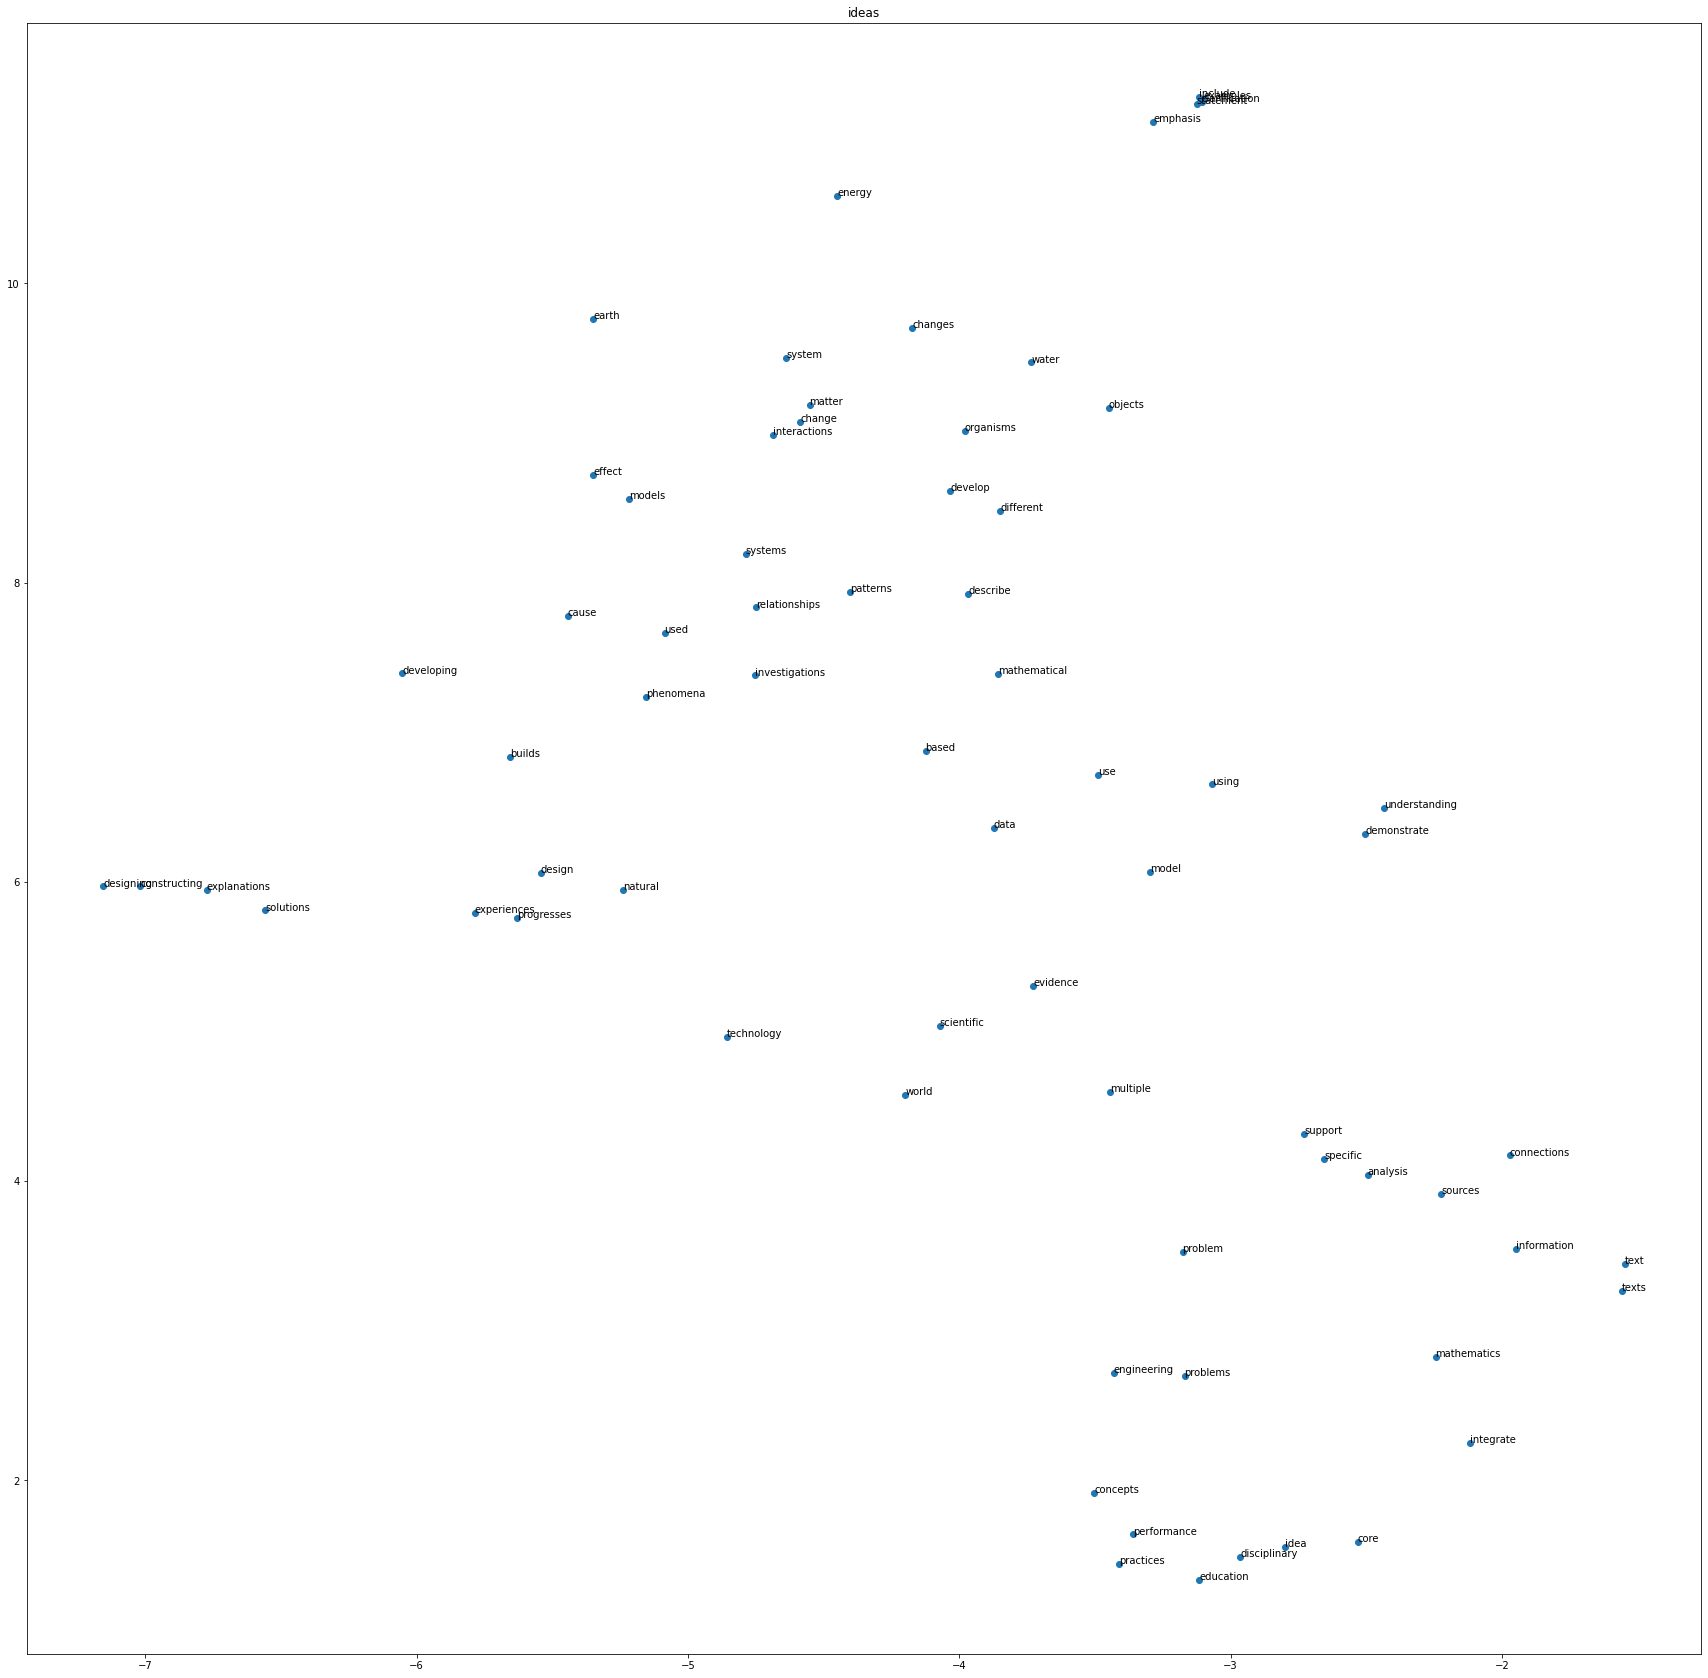

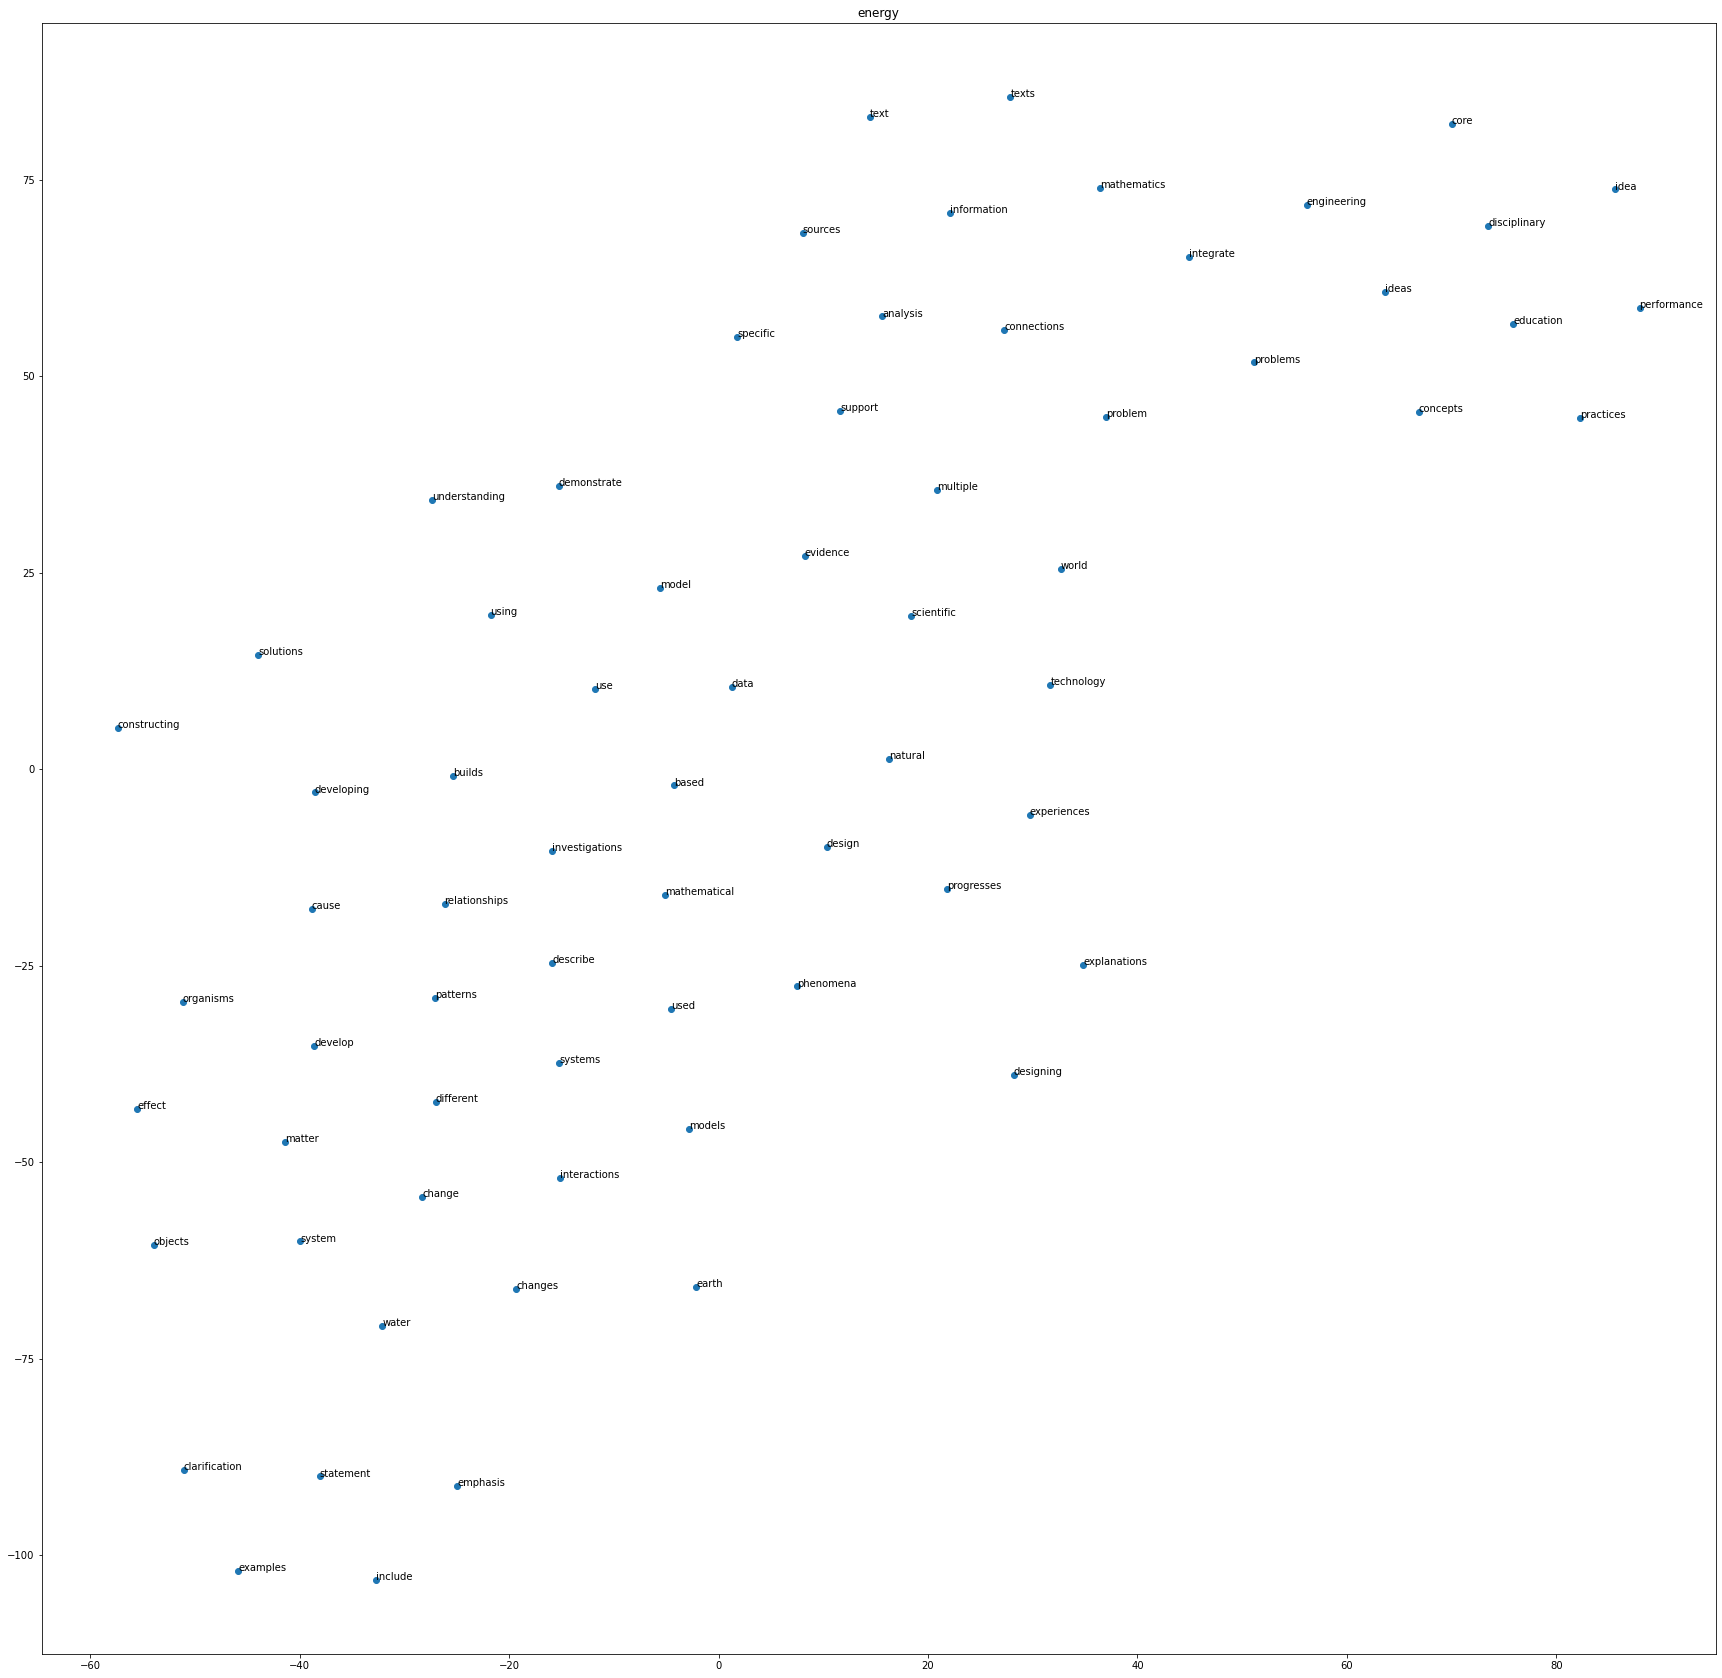

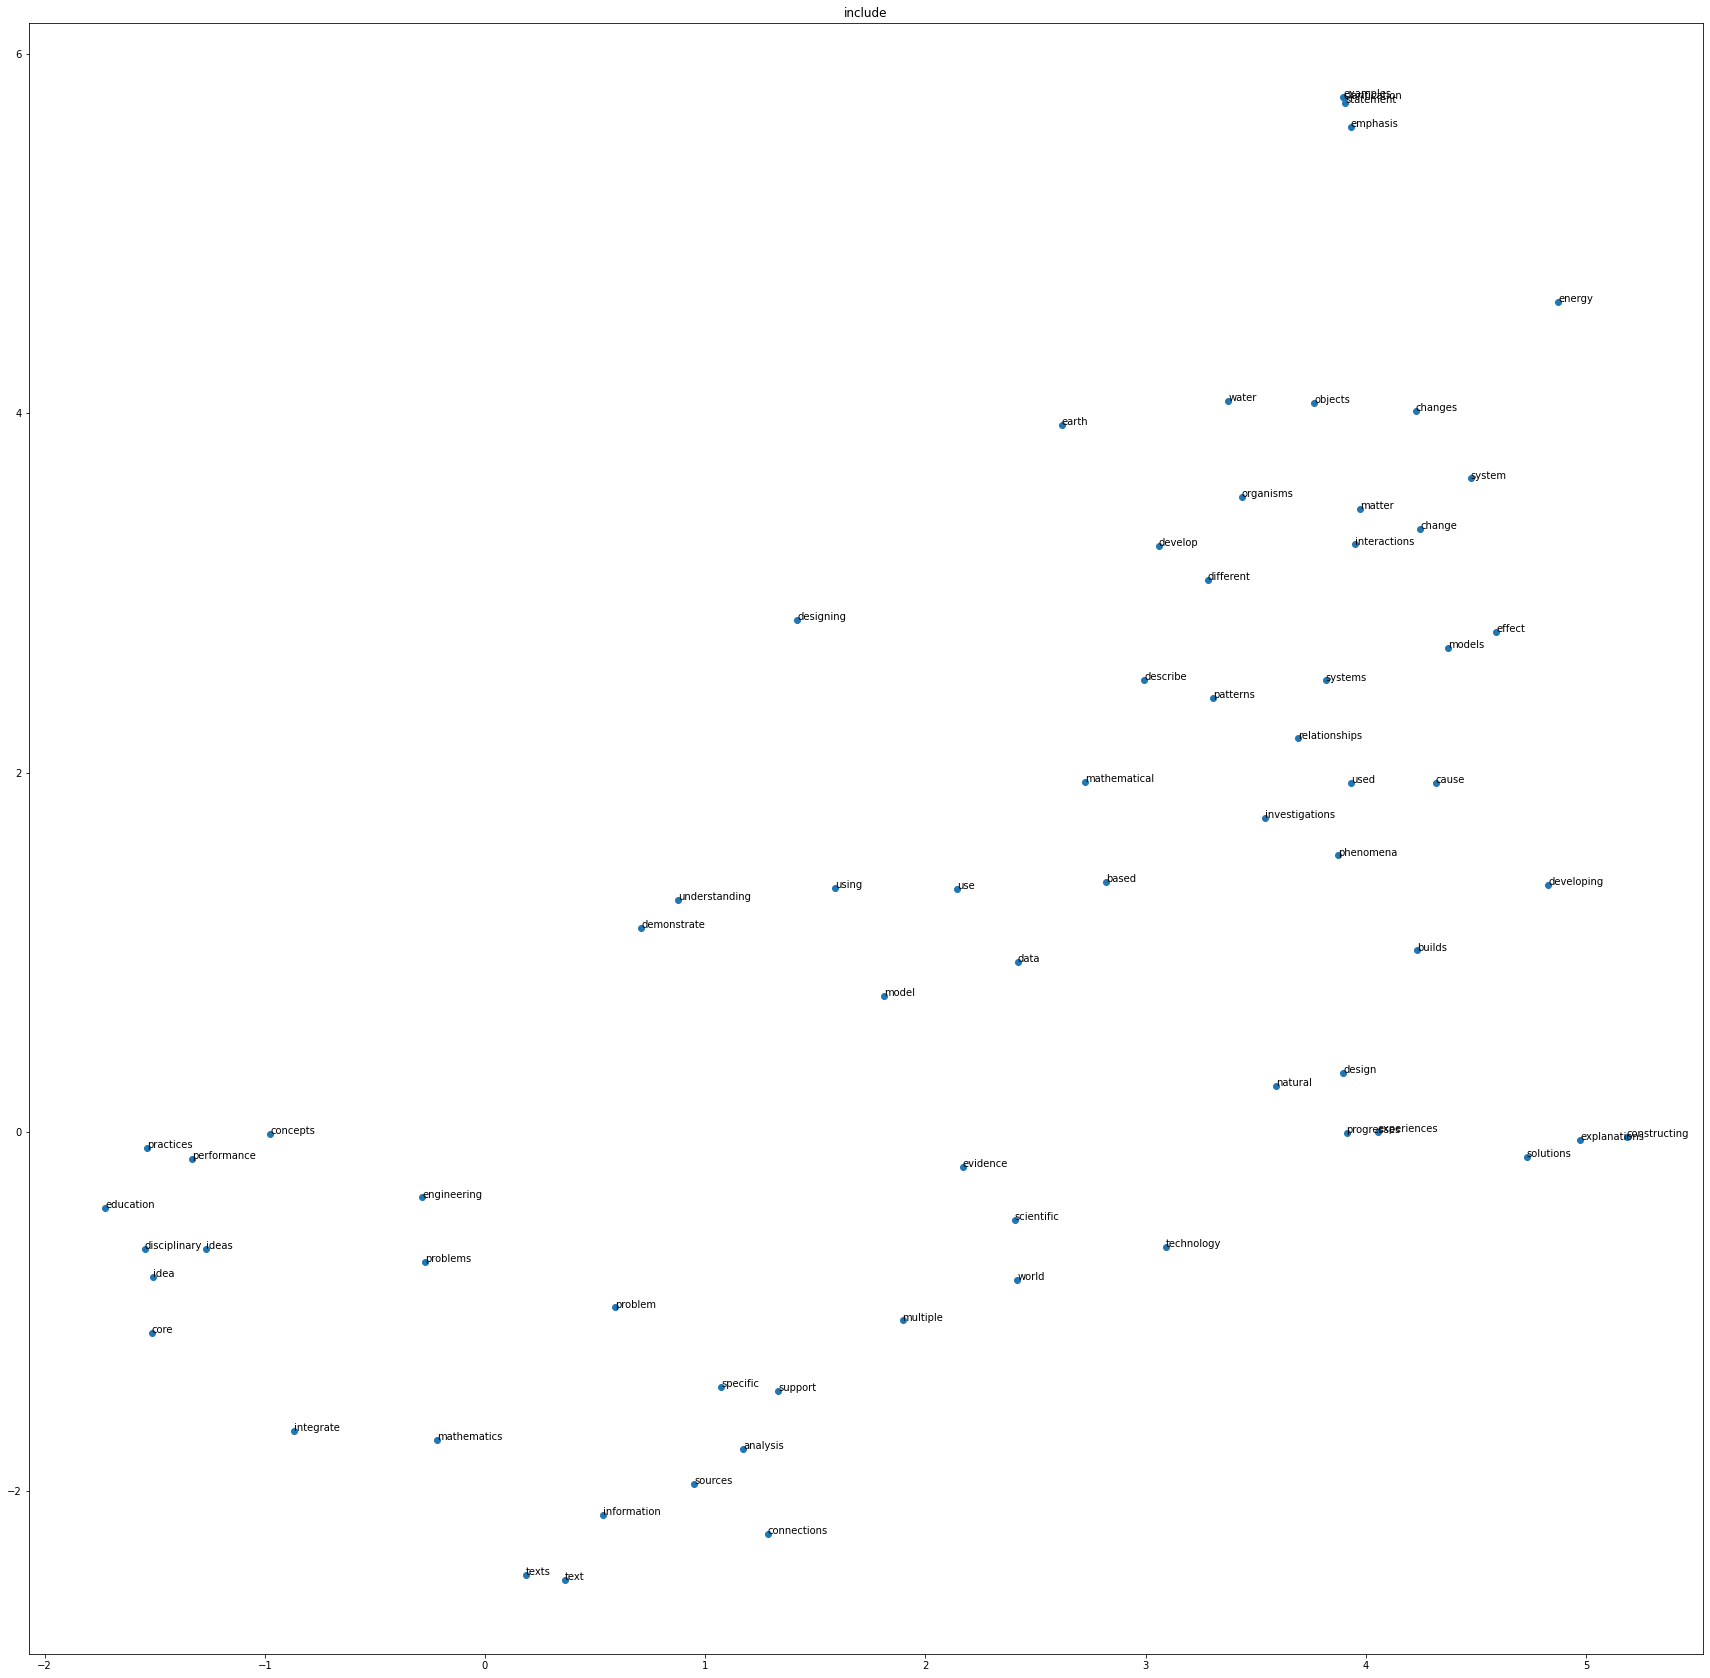

In [112]:
#examine top 10 most similar words 
top_5 = ['evidence', 'core', 'ideas', 'energy','include'] 

for word in top_5: 
    similars = model.wv.similar_by_word(word, topn=10)
    print(f"- {word}", *similars, "\n", sep="\n") 
    
#visualize the density of word relationships
for word in top_5: 
    selected_words = [w[0] for w in model.wv.most_similar(positive=[word], 
                                                          topn=100)]
    embeddings = [model.wv[w] for w in selected_words]

    mapped_embeddings = TSNE(n_components=2, metric='cosine', 
                             init='pca').fit_transform(embeddings) 

    plt.figure(figsize=(30,30)) 
    plt.title(word)
    x = mapped_embeddings[:,0]
    y = mapped_embeddings[:,1]
    plt.scatter(x, y)

    for i, txt in enumerate(selected_words):
        plt.annotate(txt, (x[i], y[i]))

In [113]:
#examine top 10 most dissimilar words 
for word in top_5:  
    dissimilars = model.wv.most_similar(negative=[word])
    #similars = model.wv.similar_by_word(negative = [word], topn=10)
    print(f"- {word}", *dissimilars, "\n", sep="\n") 
    

- evidence
('include', -0.9982132911682129)
('clarification', -0.9983896613121033)
('examples', -0.9983925819396973)
('core', -0.9985081553459167)
('statement', -0.9985151886940002)
('disciplinary', -0.9985830783843994)
('education', -0.9986339211463928)
('emphasis', -0.9986671805381775)
('energy', -0.9986913800239563)
('practices', -0.9986966848373413)


- core
('include', -0.9957818984985352)
('energy', -0.9959942698478699)
('examples', -0.996159017086029)
('statement', -0.9962085485458374)
('clarification', -0.9962236881256104)
('emphasis', -0.9964993000030518)
('designing', -0.9971063137054443)
('constructing', -0.99721759557724)
('changes', -0.997255802154541)
('system', -0.9973052144050598)


- ideas
('include', -0.9967221021652222)
('energy', -0.9969644546508789)
('examples', -0.9970490336418152)
('statement', -0.9970548748970032)
('clarification', -0.9970840811729431)
('emphasis', -0.9973679184913635)
('designing', -0.9977766275405884)
('constructing', -0.9979328513145447)
('ch

This follows intuitive and domain knowledge of word associations. The most similar words in to evidence are - based, scientific, multiple, connections, data, analysis, support, world, specific, problem. The scorings on the dissimilar words are a little less intuitive and do not seem to shed any immediate light onto the text.

## EDA Visuals 
Stylized, presentation graphs of high frequency words.

In [114]:
#Graphing of the most frequent ngss words  

x=['Using/Use', 'Evidence', 'Core', 'Ideas', 'Energy', 'Include', 
   'Information', 'Engineering', 'Data']
fig = go.Figure(go.Bar(x=x, y=[606, 467,438,415,389, 305, 302, 299, 292], 
                marker_color='rgb(75, 117, 156)',
                text=[606, 467,438,415,389, 305, 302, 299, 292],
                textposition='auto')) 

fig.update_layout(
    title='Highest Frequency Words in the NGSS Standards',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Total Number of Uses',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1)

fig.show() 

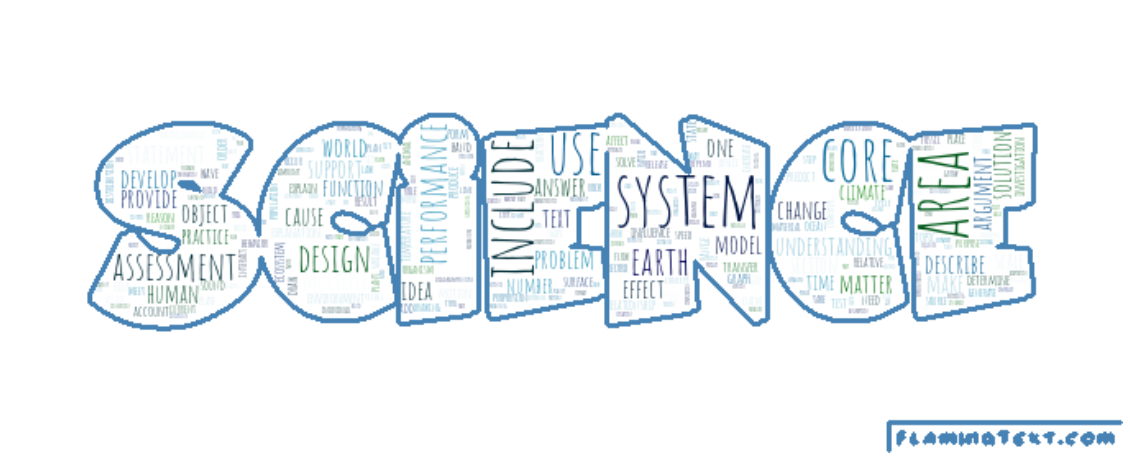

In [198]:
#stylized word cloud 
font_path = 'Images/AmaticSC-Regular.ttf' 
custom_mask = np.array(Image.open("Images/science.png"))
wc_string = (" ").join(ngss_generalclean_freqdist)

wc = WordCloud(stopwords=STOPWORDS, font_path = font_path, 
               mask=custom_mask, contour_width=2, 
               contour_color='steelblue', colormap="ocean", 
               background_color="white", max_words=1000,
               max_font_size=300, random_state=42, 
               width= 500, height= 400) 


wc.generate(wc_string) 
plt.figure( figsize=(20,10) )
plt.imshow(wc, interpolation="bilinear")
plt.axis('off') 
plt.show()

## Clustering NGSS Standards  
Use KMeans clustering to group the NGSS standards corpus and identify the word centroids for each cluster.

In [116]:
#ngss processed and tokenized 
len(ngss_processed)

39254

In [117]:
#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_features=200000, stop_words='english',
                                 use_idf=True, ngram_range=(1,3))

tfidf_matrix_ngss = tfidf_vectorizer.fit_transform(ngss_processed) 

print(tfidf_matrix_ngss.shape)

(39254, 3224)


In [118]:
#term names
terms = tfidf_vectorizer.get_feature_names() 

Background knowledge would predict that 3-5 clusters will be the best fit. 

In [119]:
k_means_3 = KMeans(n_clusters=3).fit(tfidf_matrix_ngss)
k_means_4 = KMeans(n_clusters=4).fit(tfidf_matrix_ngss)
k_means_5 = KMeans(n_clusters=5).fit(tfidf_matrix_ngss)
k_means_6 = KMeans(n_clusters=6).fit(tfidf_matrix_ngss)
k_means_7 = KMeans(n_clusters=7).fit(tfidf_matrix_ngss)

k_list = [k_means_3, k_means_4, k_means_5, k_means_6, k_means_7]

In [120]:
CH_score = []

for m in k_list:
    labels = m.labels_
    CH_score.append(calinski_harabasz_score(tfidf_matrix_ngss.toarray(), 
                                            labels))

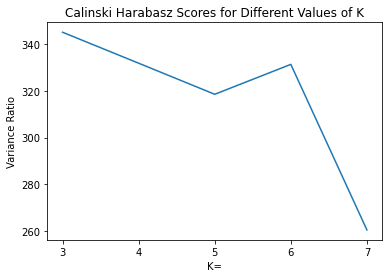

In [121]:
plt.plot([3, 4, 5, 6, 7], CH_score)
plt.xticks([3,4,5,6,7])
plt.title('Calinski Harabasz Scores for Different Values of K')
plt.ylabel('Variance Ratio')
plt.xlabel('K=')
plt.show()

In [122]:
wcss_score = []

for m in k_list:
    labels = m.labels_
    wcss_score.append(m.inertia_)

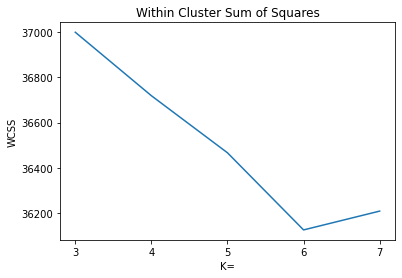

In [123]:
plt.plot([3, 4, 5, 6, 7], wcss_score)
plt.xticks([3,4,5,6,7])
plt.title('Within Cluster Sum of Squares')
plt.ylabel('WCSS')
plt.xlabel('K=')
plt.show()

Looks like there is a sharp decline at 4 clusters with the Calinski test and a smaller elbow on the cluster Sum, domain knowledge indicates that 4 is also a good cluster number choice given that the science standards are normally grouped into 3-4 categories depending on the corpus. 

In [124]:
#create and fit a model
km = KMeans(n_clusters=4)

km.fit(tfidf_matrix_ngss) 
predicted_clusters = km.predict(tfidf_matrix_ngss)

clusters = km.labels_.tolist() 

Look at a list of words in each cluster, which should start to inform theme in our clusters. 

In [125]:
vectorizer = TfidfVectorizer()

print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(4):
    print ("Cluster %d:" % i),
    for ind in order_centroids[i, :1]:
        print(' %s' % terms[ind]), 
    print

Top terms per cluster:
Cluster 0:
 evidence
Cluster 1:
 ideas
Cluster 2:
 natural
Cluster 3:
 performance


In [126]:
ngss_cluster_list = pd.DataFrame({'cluster': predicted_clusters, 
                                  'word': clusters})
ngss_cluster_list['cluster'].value_counts() 

0    38327
1      415
2      268
3      244
Name: cluster, dtype: int64

Based on these clusters it seems that three out of the four are about the teaching/ implementing process and only one is a topic (matter - is a physical science key word). This clustering is just on the intra text information, so highlighting a theme within the text, given context themes might include content and/ or explanation on process and instruction. I will apply a similar technique to inter text exploration but intra text clustering could be useful for an organization to better understand what the major themes are.  

## Classify Standards by Topic 
Use supervised learning techniques to predict a standards topic category based on it's description.

In [127]:
#ngs standards, decriptions and dci
standard_df = pickle.load(open("Pickles/ngsstandards.p", "rb" )) 
standard_df.head()

,dci,standard,tag
0,Motion and Stability: Forces and Interactions,Plan and conduct an investigation to compare t...,K-PS2-1
1,Motion and Stability: Forces and Interactions,Analyze data to determine if a design solution...,K-PS2-2
2,From Molecules to Organisms: Structures and Pr...,Use observations to describe patterns of what ...,K-LS1-1
3,Earth's Systems,Use and share observations of local weather co...,K-ESS2-1
4,Earth's Systems,Construct an argument supported by evidence fo...,K-ESS2-2


In [128]:
#examine unique standards
standard_df['dci'].unique()

array(['Motion and Stability: Forces and Interactions',
       'From Molecules to Organisms: Structures and Processes',
       "Earth's Systems", 'Earth and Human Activity',
       'Waves and Their Applications in Technologies for Information Transf',
       'Heredity: Inheritance and Variation of Traits',
       "Earth's Place in the Univers", 'Matter and Its Interactions',
       'Ecosystems: Interactions, Energy, and Dynamics',
       'Biological Evolution: Unity and Diversity', 'Engineering Design',
       'From molecules to Organisms: Structures and Processes', 'Energy',
       'Matter and its Interactions',
       'Waves and their Applications in Technologies for Information Transf',
       'Ecosystems:  Interactions, Energy, and Dynamics'], dtype=object)

In [129]:
#map a generalized label to the specific categories
generalized = {'Motion and Stability: Forces and Interactions': 'PS', 
               'From Molecules to Organisms: Structures and Processes' : 'PS',
               "Earth's Systems" : 'ES',
               'Earth and Human Activity' : 'ES',
               'Waves and Their Applications in Technologies for Information Transf' : 'PS',
               'Heredity: Inheritance and Variation of Traits': 'LS',
               "Earth's Place in the Universe" : 'ES', 
               'Matter and Its Interactions': 'ES',
               'Ecosystems: Interactions, Energy, and Dynamics': 'LS',
               'Biological Evolution: Unity and Diversity': 'LS',
               'Engineering Design': 'PS',
               'From molecules to Organisms: Structures and Processes' : 'LS', 
               'Energy': 'PS',
               'Matter and its Interactions': 'PS',
               'Waves and their Applications in Technologies for Information Transf': 'PS',
               'Ecosystems:  Interactions, Energy, and Dynamics': 'LS'}

standard_df["topic"] = standard_df["dci"].map(generalized)  

#drop nan values
standard_df = standard_df.dropna()

#create a topic id column
standard_df['topic_id'] = standard_df['topic'].factorize()[0]  

category_id_df = standard_df[['topic', 'topic_id']].drop_duplicates() \
                                                    .sort_values('topic_id') 
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['topic', 'topic_id']].values)

standard_df.head()

,dci,standard,tag,topic,topic_id
0,Motion and Stability: Forces and Interactions,Plan and conduct an investigation to compare t...,K-PS2-1,PS,0
1,Motion and Stability: Forces and Interactions,Analyze data to determine if a design solution...,K-PS2-2,PS,0
2,From Molecules to Organisms: Structures and Pr...,Use observations to describe patterns of what ...,K-LS1-1,PS,0
3,Earth's Systems,Use and share observations of local weather co...,K-ESS2-1,ES,1
4,Earth's Systems,Construct an argument supported by evidence fo...,K-ESS2-2,ES,1


In [130]:
standard_df['standard'][3]

'Use and share observations of local weather conditions to describe patterns over time.'

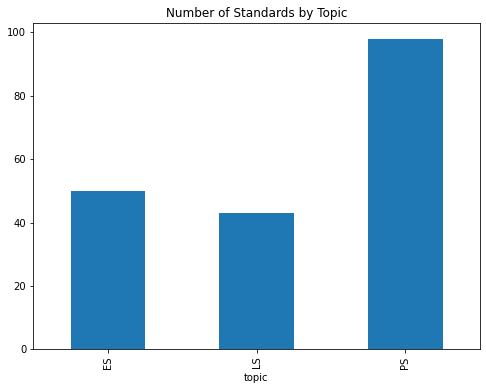

In [131]:
#visualze class distribution 
fig = plt.figure(figsize=(8,6))
standard_df.groupby('topic').topic.count().plot.bar() 
plt.title('Number of Standards by Topic') 
plt.show()

In [132]:
#vectorize the text and create features & labels
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', 
                        encoding='latin-1', ngram_range=(1, 2),
                        stop_words='english')
features = tfidf.fit_transform(standard_df.standard).toarray()
labels = standard_df.topic
features.shape

(191, 147)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(standard_df['standard'], 
                                                    standard_df['topic'],
                                                    random_state = 0)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

Now that the model has been fit, predict values that are not exact standard strings which classify well with at least one domain key word. (ie. 'energy', 'life', ect.)

In [134]:
print(clf.predict(count_vect.transform(["Use energy"])))

['PS']


Evaluating a variety of models on their preformance scores (accuracy).

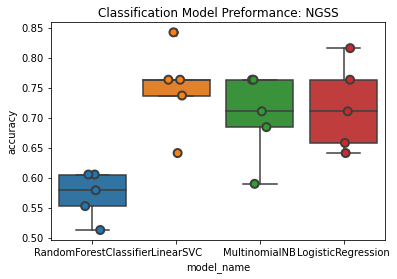

In [135]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = [] 

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, 
                               scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
                  entries.append((model_name, fold_idx, accuracy))
    cv_df = pd.DataFrame(entries, \
                         columns=['model_name', 'fold_idx', 'accuracy'])

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2) \
              .set_title('Classification Model Preformance: NGSS')
plt.show()

In [136]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.749258
LogisticRegression        0.717679
MultinomialNB             0.702159
RandomForestClassifier    0.570985
Name: accuracy, dtype: float64

The LinearSVC model preformed the best although the LogisticRegrssion Model and MultinomialNB model preformed well also (above 70%).

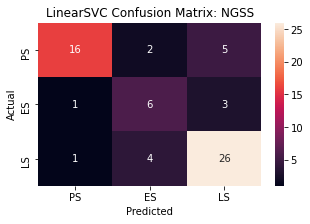

In [137]:
#evaluate the LinearSVC model 
modelsvc= LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = \
                                train_test_split(features, labels, 
                                                 standard_df.index, 
                                                 test_size=0.33, 
                                                 random_state=0)
modelsvc.fit(X_train, y_train)
y_pred = modelsvc.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred) 

fig, ax = plt.subplots(figsize=(5,3))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.topic.values,
            yticklabels=category_id_df.topic.values)
plt.ylabel('Actual')
plt.xlabel('Predicted') 
plt.title('LinearSVC Confusion Matrix: NGSS')
plt.show()

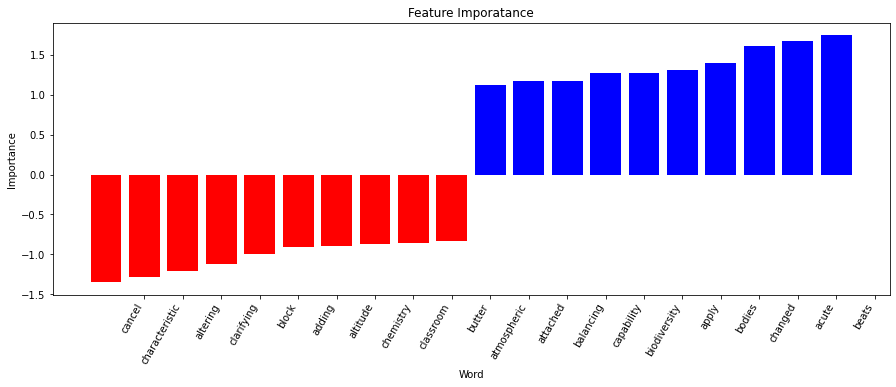

In [138]:
plot_coefficients(modelsvc, terms)

# Indiana Standards 

## Text Processing 
Each state's standards have been converted to txt file and will be cleaned generically but treated and processed individually. The same functions and process applied to the NGSS standard are applied below. 

In [139]:
#state file
us_states = ['TXTfiles/indiana']

-Txtfiles/Indiana
('ideas', 203)
('data', 193)
('engineering', 187)
('scientists', 187)
('engineers', 187)
('describe', 181)
('models', 174)
('identify', 158)
('use', 158)
('seps', 156)


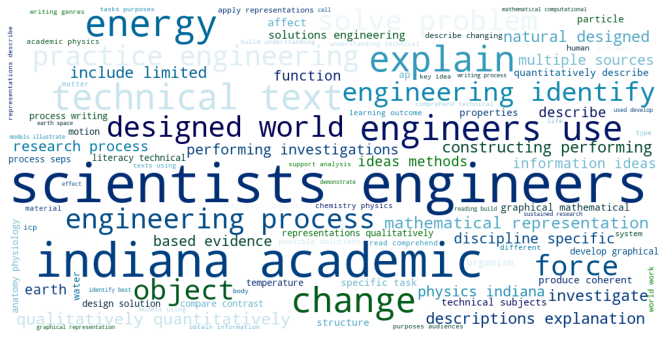

In [197]:
#create frequency list and word cloud for each state 
cleaned_words = [] 
top_words = [] 
top_25 = [] 
to_vecotrize = []
document_lenght = [] 
all_words = []

for state_name in us_states: 
    state = open_and_flatten(state_name) 
    cleaned_words.append([state_name, state])
    #look at the top 50 words on general process ngss  
    generalclean_freqdist = FreqDist(state)   
    print(f"-{state_name.title()}", *generalclean_freqdist.most_common(10), 
          sep="\n")  
    document_lenght.append(len(state))
    top_words.append([state_name, generalclean_freqdist.most_common(10)]) 
    top_25.append([state_name, generalclean_freqdist.most_common(25)])  
    all_words.append([state_name, generalclean_freqdist])
    to_vecotrize.append(state)
    word_cloud(state) 

In [141]:
#lenght of all state documents
sum(document_lenght)

21511

## Word Relationships 
Examine the word relationships within the corpus. 

In [142]:
#aligned bigram pairs and pmi pairs for each state
for state_name in us_states:  
    state = open_and_flatten(state_name) 
    print(f"-{state_name.title()}", "\n",  
          "Bigrams:", *bigram_generator(state, 10)[:5], "\n", 
          "PMI:", *pmi_generator(state, 10)[:5], "\n\n", sep="\n")

-Txtfiles/Indiana


Bigrams:
(('scientists', 'engineers'), 0.008693226721212402)
(('indiana', 'academic'), 0.006508298080052067)
(('engineers', 'use'), 0.0031611733531681464)
(('technical', 'texts'), 0.00306819766631026)
(('designed', 'world'), 0.00223141648458928)


PMI:
(('apa', 'cse'), 10.93335535501327)
(('avoiding', 'plagiarism'), 10.93335535501327)
(('citation', 'apa'), 10.93335535501327)
(('documents', 'planning'), 10.93335535501327)
(('drafting', 'revising'), 10.93335535501327)





In [143]:
#indiana 
indiana = cleaned_words[0][1]

#word ebeddings 
indiana_model = gensim.models.Word2Vec([indiana], min_count=5, window=5, 
                               size=150)  

#examine top 10 most similar words  
indiana_top_5 = ['ideas', 'engineering', 'data', 'scientists','describe'] 

for word in indiana_top_5: 
    similars = indiana_model.wv.similar_by_word(word, topn=10)
    print(f"-{word}", *similars, "\n", sep="\n") 

-ideas
('explain', 0.9999017715454102)
('including', 0.999894380569458)
('technical', 0.9998854994773865)
('within', 0.999885082244873)
('content', 0.999883770942688)
('specific', 0.9998835921287537)
('text', 0.9998828172683716)
('es', 0.9998812675476074)
('information', 0.9998790621757507)
('energy', 0.9998744130134583)


-engineering
('content', 0.9998329877853394)
('explain', 0.9998271465301514)
('ideas', 0.9998153448104858)
('es', 0.9998151659965515)
('process', 0.9998145699501038)
('information', 0.9998118281364441)
('technical', 0.999809980392456)
('specific', 0.9998098611831665)
('determine', 0.9998093247413635)
('use', 0.9998081922531128)


-data
('energy', 0.9998677968978882)
('including', 0.9998610019683838)
('explain', 0.9998549818992615)
('ideas', 0.9998547434806824)
('env', 0.9998500347137451)
('information', 0.9998460412025452)
('use', 0.9998445510864258)
('sources', 0.9998413324356079)
('text', 0.9998356103897095)
('explanations', 0.9998352527618408)


-scientists
('ener

## EDA Visuals 
Stylized, presentation graphs of high frequency words.

In [144]:
for count, value in enumerate(top_25): 
    graph_high_frequency_words(top_25, count, value[0]) 

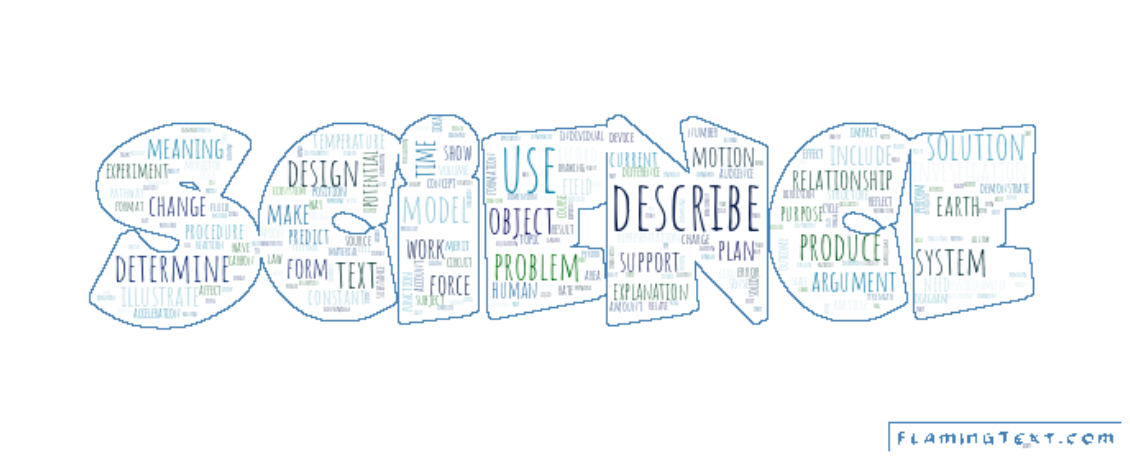

In [145]:
#stylized word cloud 
font_path = 'Images/AmaticSC-Regular.ttf' 
custom_mask = np.array(Image.open("Images/science.png"))
wc_string = (" ").join(generalclean_freqdist)

wc = WordCloud(stopwords=STOPWORDS, font_path = font_path, 
               mask=custom_mask, contour_width=.5, 
               contour_color='steelblue', colormap="ocean", 
               background_color="white", max_words=1000,
               max_font_size=300, random_state=42, 
               width= 1000, height= 900) 


wc.generate(wc_string) 
plt.figure( figsize=(20,10) )
plt.imshow(wc, interpolation="bilinear")
plt.axis('off') 
plt.show()

## Clustering Indiana Standards 
Use KMeans clustering to group standards corpus and identify the word centroids for each cluster.

In [157]:
#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_features=200000, stop_words='english',
                                 use_idf=True, ngram_range=(1,3))

tfidf_matrix_aligned = tfidf_vectorizer.fit_transform(cleaned_words[0][1]) 

print(tfidf_matrix_aligned.shape)

(21511, 2200)


In [152]:
#term names 
terms_aligned = tfidf_vectorizer.get_feature_names() 

In [158]:
#create and fit a model
kma = KMeans(n_clusters=5)

kma.fit(tfidf_matrix_aligned)  

predicted_clusters = kma.predict(tfidf_matrix_aligned)

clusters_aligned = kma.labels_.tolist() 

In [160]:
vectorizer = TfidfVectorizer()

print("Top terms per cluster:")
order_centroids = kma.cluster_centers_.argsort()[:, ::-1] 

for i in range(5):
    print ("Cluster %d:" % i),
    for ind in order_centroids[i, :1]:
        print(' %s' % terms_aligned[ind]), 
    print

Top terms per cluster:
Cluster 0:
 data
Cluster 1:
 constructing
Cluster 2:
 ideas
Cluster 3:
 indiana
Cluster 4:
 solutions


# Comparing State & NGSS Standards
Examine the highest frequency words from each of the standards corpus to identify any patterns and which words are most prevalent across all standards. 

In [186]:
#highest frequency indiana words 
top_words

[['TXTfiles/indiana',
  [('ideas', 203),
   ('data', 193),
   ('engineering', 187),
   ('scientists', 187),
   ('engineers', 187),
   ('describe', 181),
   ('models', 174),
   ('identify', 158),
   ('use', 158),
   ('seps', 156)]]]

In [190]:
#highest frequency ngss words
ngss_top10

[('evidence', 467),
 ('core', 438),
 ('ideas', 415),
 ('energy', 389),
 ('include', 305),
 ('using', 304),
 ('information', 302),
 ('engineering', 299),
 ('use', 296),
 ('data', 292),
 ('systems', 284)]

In [200]:
all_words

[['TXTfiles/indiana',
  FreqDist({'ideas': 203, 'data': 193, 'engineering': 187, 'scientists': 187, 'engineers': 187, 'describe': 181, 'models': 174, 'identify': 158, 'use': 158, 'seps': 156, ...})]]

## Clustering All Standards 
Clustering state standards to identify patterns of intra textual relationships. State's that are aligned with the NGSS standards should cluster closer to states that are independent. Additionally clustering may lead to better insight into which states are more closely grouped than others. This code is borrowed heavily from Brandon Rose's excellent project on the same subject which can be seen [here](https://github.com/brandomr/document_cluster/blob/master/cluster_analysis_web.ipynb)

In [81]:
#create a nested list
s = ['ngss'] 
s.append(ngss) 

#create a ngss dataframe
ngss_corpi = pd.DataFrame(s, columns=["corpus"]) 
ngss_corpi['state'] = "ngss" 
ngss_corpi.drop([0], axis=0)

,corpus,state
1,"[topic, arrangements, next, generation, beginn...",ngss


In [82]:
#create a state dataframe 
state_corpi = pd.DataFrame(cleaned_words, columns=["state", "corpus"]) 

#join states & ngss
standards_corpi = pd.concat([state_corpi, ngss_corpi], axis=0)  
standards_corpi = standards_corpi.reset_index().drop([31], axis=0)
standards_corpi = standards_corpi.reset_index().drop(columns=['index'])  

standards_corpi.head()

,level_0,state,corpus
0,0,TXTfiles/alabama,"[information, regarding, course, study, materi..."
1,1,TXTfiles/alaska,"[dept, education, early, development, board, e..."
2,2,TXTfiles/arizona,"[department, education, academic, introduction..."
3,3,TXTfiles/colorado,"[review, revision, committee, chairpersons, jo..."
4,4,TXTfiles/flordia,"[specifications, florida, state, adoption, ins..."


By passing each state's documents as a single string into a dataframe I can compare the states directly. Currently this is only a surface level comparison - literally how close one string is to the next. Future work could include a meaning or context embedding and comparison. 

In [83]:
#clearn corpus column
standards_corpi['corpus'] = standards_corpi['corpus'].astype(str)  
standards_corpi['corpus'] = standards_corpi['corpus'].apply(lambda x: 
                                                            x.strip("[")
                                                            .strip("]"))

In [84]:
#set features & labels to list
corpi_list = standards_corpi['corpus'].values.tolist() 
state_list = standards_corpi['state'].values.tolist()

In [85]:
#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, 
                                   ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(corpi_list)

/Users/kristen/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop

In [86]:
#values needed later for kmeans 
terms = tfidf_vectorizer.get_feature_names() 
dist = 1 - cosine_similarity(tfidf_matrix)

Now that I've vectorized each states document I can pass it into the Kmeans clustering. I passed three self reported categories into the model NGSS, the aligned states, and then the independent states. I will test what th model evaluates the right number of clusters at before assuming three clusters will best represent this data.

In [87]:
k_means_3 = KMeans(n_clusters=3).fit(tfidf_matrix)
k_means_4 = KMeans(n_clusters=4).fit(tfidf_matrix)
k_means_5 = KMeans(n_clusters=5).fit(tfidf_matrix)
k_means_6 = KMeans(n_clusters=6).fit(tfidf_matrix)
k_means_7 = KMeans(n_clusters=7).fit(tfidf_matrix)

k_list = [k_means_3, k_means_4, k_means_5, k_means_6, k_means_7]

In [88]:
CH_score = []

for m in k_list:
    labels = m.labels_
    CH_score.append(calinski_harabasz_score(tfidf_matrix.toarray(), 
                                            labels))

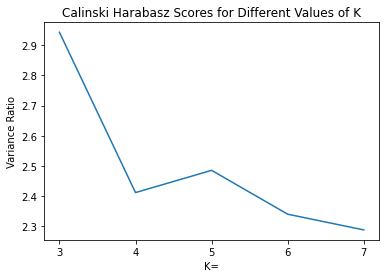

In [89]:
plt.plot([3, 4, 5, 6, 7], CH_score)
plt.xticks([3,4,5,6,7])
plt.title('Calinski Harabasz Scores for Different Values of K')
plt.ylabel('Variance Ratio')
plt.xlabel('K=')
plt.show()

In [90]:
wcss_score = []

for m in k_list:
    labels = m.labels_
    wcss_score.append(m.inertia_)

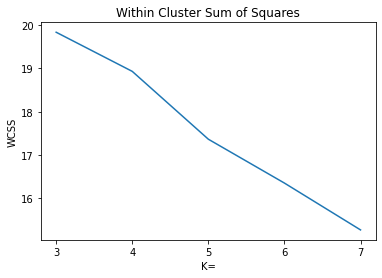

In [91]:
plt.plot([3, 4, 5, 6, 7], wcss_score)
plt.xticks([3,4,5,6,7])
plt.title('Within Cluster Sum of Squares')
plt.ylabel('WCSS')
plt.xlabel('K=')
plt.show()

Both tests show an elbow at 5 clusters, so I will cluster 5, it will be interesting to see if there are are any geographical correlations to the clusters.

In [92]:
#preform k means clustering
num_clusters = 3

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

In [93]:
cluster_list = pd.DataFrame({'cluster': clusters, 'state': state_list})
cluster_list['cluster'].value_counts() 

0    11
1    11
2     9
Name: cluster, dtype: int64

Looks like a fairly even distribution of states in each cluster with cluster 3 having the largest number of states at 11 and 2 having the smallest at only 5 states. Next I want visualize this data.

In [94]:
#MDS to reduce dimensionality before graphing

MDS() 

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist) 

xs, ys = pos[:, 0], pos[:, 1]

In [95]:
#create a dataframe of results 
df = pd.DataFrame({'cluster': clusters, 'state': state_list, 'x':xs, 'y':ys})

In [96]:
#create a list of names that will be visually appealling in graph
df['statename'] = df['state'].astype(str).str[9:]

df.loc[df.index[30], 'statename'] = "ngss"

In [97]:
#isolate the ngss information
ngss_information = df.loc[df['state'] =='ngss'] 

#graphing dataframe 
df = df.drop(30)

In [98]:
cluster_names = {0: 'Group 3', 
                 1: 'Group 2', 
                 2: 'Group 1'}

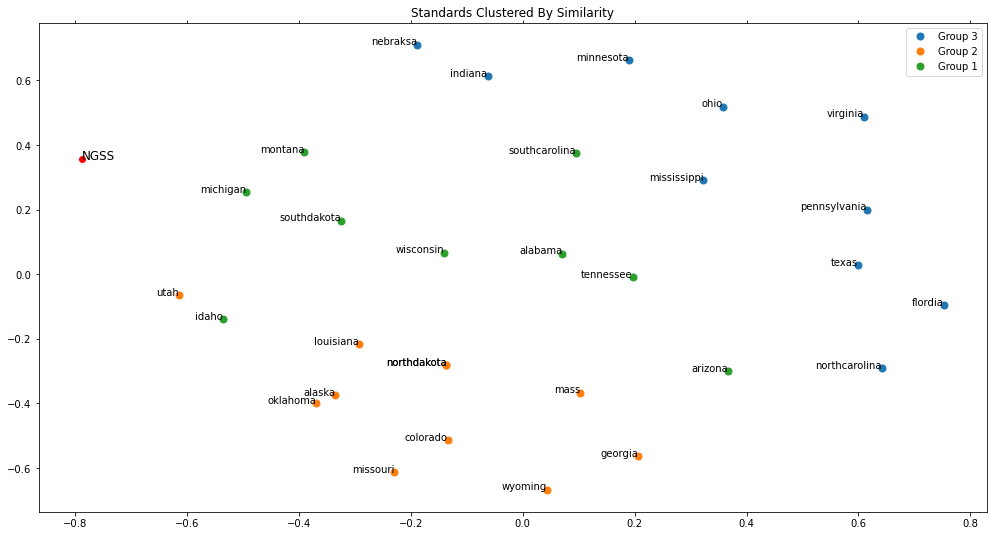

In [99]:
#group by cluster
groups = df.groupby('cluster')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) 
ax.margins(0.05) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='.', linestyle=' ', ms=14, 
            label=cluster_names[name]) 
    
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          
        which='both',     
        bottom='off',      
        top='off',         
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         
        which='both',      
        left='off',      
        top='off',         
        labelleft='off') 
     
ax.legend(numpoints=1)   
ax.plot([-0.788260], [0.356118], 'ro')
ax.annotate(xy=(-0.788260, 0.356118), s='NGSS', size='large')


for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['statename'], 
            size='medium', ha='right') 
    


plt.title("Standards Clustered By Similarity")    
plt.show() 

This looks great! The independently developed state standards have all been classified correctly! There is an interesting split of states that are in the somewhat aligned group. I will save this metric and track it as I continue to go. Next I am going to visualize the groupings hierarchically which should again, highlight in more nuance how closely aligned two corpus are.

In [100]:
state_df

,state,update_year,standards,two_letter
0,alabama,2015,aligned,AL
1,alaska,2017,aligned,AK
2,arizona,2018,aligned,AZ
3,arkansas,2016,adopted,AR
4,california,2013,adopted,CA
5,colorado,2020,aligned,CO
6,conneticut,2015,adopted,CT
7,delaware,2016,adopted,DE
8,flordia,2008,independent,FL
9,georgia,2016,aligned,GA


In [101]:
#join clusters with alignment for visualization
clusters_df = state_df.loc[state_df['standards'] != 'adopted'] 

clusters_df = state_df.merge(df, left_on='state', right_on='statename') 

clusters_df

,state_x,update_year,standards,two_letter,cluster,state_y,x,y,statename
0,alabama,2015,aligned,AL,2,TXTfiles/alabama,0.070722,0.064022,alabama
1,alaska,2017,aligned,AK,1,TXTfiles/alaska,-0.335022,-0.374899,alaska
2,arizona,2018,aligned,AZ,2,TXTfiles/arizona,0.367179,-0.300013,arizona
3,colorado,2020,aligned,CO,1,TXTfiles/colorado,-0.134402,-0.514159,colorado
4,flordia,2008,independent,FL,0,TXTfiles/flordia,0.752971,-0.095801,flordia
5,georgia,2016,aligned,GA,1,TXTfiles/georgia,0.206234,-0.563083,georgia
6,idaho,2018,aligned,ID,2,TXTfiles/idaho,-0.535974,-0.139579,idaho
7,indiana,2016,aligned,IN,0,TXTfiles/indiana,-0.062967,0.613359,indiana
8,louisiana,20202,aligned,LA,1,TXTfiles/louisiana,-0.293300,-0.217093,louisiana
9,michigan,2015,independent,MI,2,TXTfiles/michigan,-0.494193,0.254914,michigan


In [102]:
clusters_df.loc[clusters_df['standards'] == 'independent'] 
clusters_df['cluster'] = clusters_df['cluster'].astype(str)

Looking at this all but one of the self reported aligned states falls into either the orange or green cluster and all but one of the independent states fall into the blue cluster. This shows that the text for standards in these states is pretty similar and that this is a solid method for identifying similar documents. The two groups within the aligned states may indicate that there are state standards that are more aligned with other states than they are to the NGSS corpus. Below I am going to make a series of maps to help spell this point out in the slide deck.

In [103]:
clusters_df

,state_x,update_year,standards,two_letter,cluster,state_y,x,y,statename
0,alabama,2015,aligned,AL,2,TXTfiles/alabama,0.070722,0.064022,alabama
1,alaska,2017,aligned,AK,1,TXTfiles/alaska,-0.335022,-0.374899,alaska
2,arizona,2018,aligned,AZ,2,TXTfiles/arizona,0.367179,-0.300013,arizona
3,colorado,2020,aligned,CO,1,TXTfiles/colorado,-0.134402,-0.514159,colorado
4,flordia,2008,independent,FL,0,TXTfiles/flordia,0.752971,-0.095801,flordia
5,georgia,2016,aligned,GA,1,TXTfiles/georgia,0.206234,-0.563083,georgia
6,idaho,2018,aligned,ID,2,TXTfiles/idaho,-0.535974,-0.139579,idaho
7,indiana,2016,aligned,IN,0,TXTfiles/indiana,-0.062967,0.613359,indiana
8,louisiana,20202,aligned,LA,1,TXTfiles/louisiana,-0.293300,-0.217093,louisiana
9,michigan,2015,independent,MI,2,TXTfiles/michigan,-0.494193,0.254914,michigan


In [104]:
#just aligned
with urlopen("https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json") as response: 
    counties = json.load(response)
    
fig = px.choropleth(clusters_df.loc[clusters_df['standards'] == 'aligned'], 
                    locations='two_letter', locationmode="USA-states", 
                    color='standards', scope='usa',
                    color_discrete_sequence=('rgb(26, 118, 255)', 
                                             'rgb(75, 117, 156)', 
                                             'rgb(135, 206, 235)'))  
         
fig.update_layout(title_text = "Self Reported NGSS Aligned State Standards")
fig.show()

In [105]:
#just aligned with cluster colors
with urlopen("https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json") as response: 
    counties = json.load(response)
    
fig = px.choropleth(clusters_df.loc[clusters_df['standards'] == 'aligned'], 
                    locations='two_letter', locationmode="USA-states", 
                    color='cluster', scope='usa',
                    color_discrete_sequence=('rgb(0,128,0)', 
                                             'rgb(255,140,0)', 
                                            'rgb(0,0,255)'))  
         
fig.update_layout(title_text = "Clustered NGSS Aligned State Standards")
fig.show()

In [106]:
#just independent
with urlopen("https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json") as response: 
    counties = json.load(response)
    
fig = px.choropleth(clusters_df.loc[clusters_df['standards'] == 'independent'], 
                    locations='two_letter', locationmode="USA-states", 
                    color='standards', scope='usa',
                    color_discrete_sequence=( 'rgb(135, 206, 235)', 
                                             'rgb(135, 206, 235)'))  
         
fig.update_layout(title_text = "Self Reported Independently Developed State Standards")
fig.show()

In [107]:
#just independent with cluster colors
with urlopen("https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json") as response: 
    counties = json.load(response)
    
fig = px.choropleth(clusters_df.loc[clusters_df['standards'] == 'independent'], 
                    locations='two_letter', locationmode="USA-states", 
                    color='cluster', scope='usa',
                    color_discrete_sequence=('rgb(0,0,255)', 
                                             'rgb(255,140,0)', 
                                            'rgb(0,0,255)'))  
         
fig.update_layout(title_text = "Clustered Independently Developed State Standards")
fig.show()

In [108]:
linkage_matrix = ward(dist)   

state_names = df['statename'].tolist()  
color_list = ['rgb(0,129,55)', 'rgb(124,229,100)', 'rgb(255,233,80)', 
             'rgb(255,139,241)', 'rgb(255,155,0)'] 

X = np.random.rand(15, 10) # 15 samples, with 10 dimensions each
fig = ff.create_dendrogram(linkage_matrix, color_threshold=30,
                           labels=state_names,colorscale =color_list)
fig.update_layout(width=800, height=500, plot_bgcolor='rgba(0,0,0,0)') 
fig.update_layout(title_text = "Hierarchically Grouped State Standards")
fig.show()

This really clearly shows two large and equally sized groups that diverge at 3 degrees of cosine difference. In one group is NGSS standards and the other prominent independent standards such as Texas. This is a powerful tool to quickly visualize the degree of similarity to pieced of writing have to one another. I will add each states cluster to a scores df to use in my final attempt to quantify alignment. 

In [109]:
scores = df.drop(['x', 'y'], axis =1) 

In [110]:
standards_corpi

,level_0,state,corpus
0,0,TXTfiles/alabama,"'information', 'regarding', 'course', 'study',..."
1,1,TXTfiles/alaska,"'dept', 'education', 'early', 'development', '..."
2,2,TXTfiles/arizona,"'department', 'education', 'academic', 'introd..."
3,3,TXTfiles/colorado,"'review', 'revision', 'committee', 'chairperso..."
4,4,TXTfiles/flordia,"'specifications', 'florida', 'state', 'adoptio..."
5,5,TXTfiles/georgia,"'excellence', 'first', 'excellence', 'designed..."
6,6,TXTfiles/idaho,"'content', 'state', 'superintendent', 'public'..."
7,7,TXTfiles/indiana,"'physics', 'engineering', 'process', 'seps', '..."
8,8,TXTfiles/louisiana,"'shifts', 'following', 'key', 'shifts', 'calle..."
9,9,TXTfiles/mass,"'massachusetts', 'technology', 'framework', 'e..."


In [111]:
#pickle clustrers df 
standards_corpi.to_pickle("./standards_corpi.pkl")

## Scattertext 
Using the Scattertext library (found [here](https://github.com/JasonKessler/scattertext#using-scattertext-as-a-text-analysis-library-finding-characteristic-terms-and-their-associations)) to classify word importance in text This powerful library has a lot of built in functions that quickly (and beautiful) process NLP tasks such as word sentiment and association. In conjunction with a report or audit of a groups alignment this tools (touched only briefly here would add impressive visuals on deliverables.

In [112]:
#join state text to alignment df
scatter_text = state_df.loc[state_df['standards'] != 'adopted']  
scatter_text = scatter_text.reset_index().drop('index', axis=1)

In [113]:
#set features & labels to list
corpi_list = standards_corpi['corpus'].values.tolist() 
state_list = standards_corpi['state'].values.tolist()

In [114]:
standards_corpi

,level_0,state,corpus
0,0,TXTfiles/alabama,"'information', 'regarding', 'course', 'study',..."
1,1,TXTfiles/alaska,"'dept', 'education', 'early', 'development', '..."
2,2,TXTfiles/arizona,"'department', 'education', 'academic', 'introd..."
3,3,TXTfiles/colorado,"'review', 'revision', 'committee', 'chairperso..."
4,4,TXTfiles/flordia,"'specifications', 'florida', 'state', 'adoptio..."
5,5,TXTfiles/georgia,"'excellence', 'first', 'excellence', 'designed..."
6,6,TXTfiles/idaho,"'content', 'state', 'superintendent', 'public'..."
7,7,TXTfiles/indiana,"'physics', 'engineering', 'process', 'seps', '..."
8,8,TXTfiles/louisiana,"'shifts', 'following', 'key', 'shifts', 'calle..."
9,9,TXTfiles/mass,"'massachusetts', 'technology', 'framework', 'e..."


In [115]:
scatter_text['corpus'] = standards_corpi['corpus']

In [116]:
scatter_text

,state,update_year,standards,two_letter,corpus
0,alabama,2015,aligned,AL,"'information', 'regarding', 'course', 'study',..."
1,alaska,2017,aligned,AK,"'dept', 'education', 'early', 'development', '..."
2,arizona,2018,aligned,AZ,"'department', 'education', 'academic', 'introd..."
3,colorado,2020,aligned,CO,"'review', 'revision', 'committee', 'chairperso..."
4,flordia,2008,independent,FL,"'specifications', 'florida', 'state', 'adoptio..."
5,georgia,2016,aligned,GA,"'excellence', 'first', 'excellence', 'designed..."
6,idaho,2018,aligned,ID,"'content', 'state', 'superintendent', 'public'..."
7,indiana,2016,aligned,IN,"'physics', 'engineering', 'process', 'seps', '..."
8,louisiana,20202,aligned,LA,"'shifts', 'following', 'key', 'shifts', 'calle..."
9,massachusetts,2016,aligned,MA,"'massachusetts', 'technology', 'framework', 'e..."


In [117]:
#pickle df 
scatter_text.to_pickle("./scatter_text.pkl")

In [118]:
# Turn it into a Scattertext Corpus 
nlp = spacy.load('en')
corpus = st.CorpusFromPandas(scatter_text, 
                             category_col='standards', 
                              text_col='corpus',
                             nlp=nlp).build()

In [119]:
#unique corpus words 
print("Corpus Unique Words:")
word = list(corpus.get_scaled_f_scores_vs_background().index[:10]) 
for w in word: 
    print("-", w)

Corpus Unique Words:
- crosscutting
- clarification
- organisms
- explanations
- constructing
- hydrosphere
- observable
- disciplinary
- phenomena
- interpreting


In [120]:
#words most associated with aligned states 
print("Aligned State Score:")
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Aligned Score'] = corpus.get_scaled_f_scores('aligned')
al = list(term_freq_df.sort_values(by='Aligned Score', ascending=False) 
          .index[:20])
for a in al: 
    print("-", a)

Aligned State Score:
- boundary assessment
- assessment boundary
- assessment include
- ideas crosscutting
- clarification statement
- statement emphasis
- ela
- progresses
- assessment limited
- massachusetts
- experiences progresses
- ses
- concepts asking
- connection nd
- developed using
- extended benchmarks
- elements framework
- using following
- following elements
- answer question


The list is insightful and also brings a point of future work to process data more/ iterate over the cleaning project to remove words like "Massachusetts" from the list.

In [121]:
#words most associated with aligned states 
print("Independent State Score:")
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Independent Score'] = corpus.get_scaled_f_scores('independent')
ind = list(term_freq_df.sort_values(by='Independent Score', ascending=False)
           .index[:20])
for i in ind: 
    print("-", i)

Independent State Score:
- recalling accurate
- student expected
- concepts solutions
- pa recognize
- cognitive demands
- accurate concepts
- knowledge recalling
- engineering demonstrating
- communicating technological
- demonstrating knowledge
- interpreting communicating
- designing interpreting
- learning adopted
- unpacked content
- adopted designing
- access point
- florida
- visions
- people learn
- types thinking


The text analysis in this package is a great way to quickly understand what text is part of a corpus and what isn't. Often an organization like NGSS is deeply concerned with the manner in which they represent themselves. Implementing this tool would allow for easy self audit of language use as well as analysis of other groups text. 

In [122]:
from IPython.core.display import display, HTML
display(HTML('<h1>Hello, world!</h1>'))

In [123]:
scatter_text.loc[scatter_text['standards'] == 'independent']

,state,update_year,standards,two_letter,corpus
4,flordia,2008,independent,FL,"'specifications', 'florida', 'state', 'adoptio..."
10,michigan,2015,independent,MI,"'overview', 'organization', 'structure', 'perf..."
16,north carolina,2004,independent,NC,"'designed', 'help', 'educators', 'teach', 'ess..."
18,ohio,2019,independent,OH,"'learning', 'model', 'adopted', 'february', 'm..."
20,pennsylvania,2002,independent,PA,"'academic', 'technology', 'department', 'educa..."
24,texas,2017,independent,TX,"'elementary', 'essential', 'knowledge', 'skill..."
26,virginia,2018,independent,VA,"'wi', 'swisconsin', 'ddepartment', 'rt', 'fpub..."


In [124]:
html = st.produce_scattertext_explorer(corpus, category='aligned',
                                       category_name='Aligned State Words',
                                       not_category_name='Independent State Words',
                                       width_in_pixels=1000)
open("Standards_Visualization.html", 'wb').write(html.encode('utf-8'))

13065130

# Quantifying Alignment Between State & NGSS Standards
Using a wide variety of NLP techniques and similarity scores compare the standards from each state to that of the NGSS standards to begin building a measure for alignment. For the purposes of this project alignment will be defined by how similar two corpus are semantically. The theory behind this is that organizations that are aligned should describe a similar topic in similar ways i.e. the language a state that is aligned to the NGSS standards chooses to use should be similar to the language used to describe a specific standard or grade band.

## Cosine Distance (Gensim)
Use gensim similarity to compare whole text alignment between NGSS (set as index) and each of the state's standards. 

In [125]:
# Set the NGSS Index  
ngss_docs = []
with open ('TXTfiles/ngss') as f:
    tokens = sent_tokenize(f.read())
    for line in tokens:
        ngss_docs.append(line)

#preprocess ngss file using the gensim model
processed_ngss = preprocess_documents(ngss_docs)

#create a ngss dictionary
ngss_dictionary = gensim.corpora.Dictionary(processed_ngss) 

#create the corpus 
ngss_corpus = [ngss_dictionary.doc2bow(processed_ngss) for processed_ngss in 
               processed_ngss] 

In [126]:
#set the index to ngss standards 
tf_idf = gensim.models.TfidfModel(ngss_corpus)
sims = gensim.similarities.Similarity('/Users/kristen/Flatiron/Capstone', 
                                      tf_idf[ngss_corpus], 
                                      num_features=len(ngss_dictionary))

Using a custom built function run a comparison of each state's standards, returning a rounded percentage score to indicate similarity of document (alignment). This is a sum of cosine similarity scores to the index that has been summed and divided by the length of that state's corpus. Because it is using the NGSS corpus I did not move it to the py functions document but the functionization is still useful to apply to all states efficiently. 

In [127]:
def compare_docs(textfile):   
    """Compares the NGSS indexed corpus to another corpus for similarity  
    Args: 
        textfile: a txt file 
    
    Returns: 
        A similarity score between txt file and NGSS index
        
    """
  
    current_doc = []
    with open (textfile) as f:
        tokens = sent_tokenize(f.read())
        for line in tokens:
            current_doc.append(line) 
    
    processed_doc = preprocess_documents(current_doc)  
    dictionary_current = gensim.corpora.Dictionary(processed_doc)  
    corpus_current = [dictionary_current.doc2bow(processed_doc) 
                      for processed_doc in processed_doc]  
    tf_idf = gensim.models.TfidfModel(ngss_corpus)
            
    current_doc_tf_idf = tf_idf[corpus_current]
    sum_of_sim =(np.sum(sims[current_doc_tf_idf], dtype=np.float32)) 
    percentage_of_similarity = round(float(sum_of_sim / len(current_doc)))
    name = state.title() 
    print("{} Alignment: %{}".format(name, percentage_of_similarity)) 
    return percentage_of_similarity

In [128]:
gensim_scores = []
for state in us_states:   
    gensim_scores.append(compare_docs(state))

Txtfiles/Alabama Alignment: %16
Txtfiles/Alaska Alignment: %23
Txtfiles/Arizona Alignment: %27
Txtfiles/Colorado Alignment: %14
Txtfiles/Flordia Alignment: %17
Txtfiles/Georgia Alignment: %24
Txtfiles/Idaho Alignment: %22
Txtfiles/Indiana Alignment: %39
Txtfiles/Louisiana Alignment: %23
Txtfiles/Mass Alignment: %18
Txtfiles/Michigan Alignment: %27
Txtfiles/Minnesota Alignment: %19
Txtfiles/Mississippi Alignment: %14
Txtfiles/Missouri Alignment: %29
Txtfiles/Montana Alignment: %32
Txtfiles/Nebraksa Alignment: %34
Txtfiles/Northcarolina Alignment: %23
Txtfiles/Northdakota Alignment: %15
Txtfiles/Ohio Alignment: %16
Txtfiles/Oklahoma Alignment: %24
Txtfiles/Pennsylvania Alignment: %22
Txtfiles/Southcarolina Alignment: %21
Txtfiles/Southdakota Alignment: %20
Txtfiles/Tennessee Alignment: %24
Txtfiles/Texas Alignment: %32
Txtfiles/Utah Alignment: %10
Txtfiles/Wisconsin Alignment: %16
Txtfiles/Northdakota Alignment: %15
Txtfiles/Wyoming Alignment: %13
Txtfiles/Virginia Alignment: %26


In [129]:
#add scores to my scores dataframe
scores['gensim_score'] = gensim_scores 

scores.head()

,cluster,state,statename,gensim_score
0,2,TXTfiles/alabama,alabama,16
1,1,TXTfiles/alaska,alaska,23
2,2,TXTfiles/arizona,arizona,27
3,1,TXTfiles/colorado,colorado,14
4,0,TXTfiles/flordia,flordia,17


Looking at this score nothing is above 40% which is not surprising for whole text comparison however the aligned states do tend to score higher than the independently developed states. There are exceptions to this such as Virgina (unaligned/ scored 27%) but aligned states such as Georgia (31%) do show promise. While this metric alone could not be used to quantify alignment it does highlight similarity trends. Future work could apply this method to a corpus of just standard and see if that improved results. 

## Word Mover's Distance  
Word Mover's Distance calculates the 'steps' needed to get from one document to another. Thus a low score would indicate a highly similar (aligned) document from a Word2Vec model that has been pre-trained on Google News data. The data set this w2v was trained on is too large to upload on Github, to download and run locally use the file [here](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and then changed the `filename` variable to locally downloaded file. For the purpose of this project the code has been set to Raw and the scores have been saved in a pickled file.

First I will calculate the wmd score for two standards that are fairly similar, this should produce a relatively low score, and demonstrate effectiveness of this metric.

Low value score on the test text vs the random test demonstrates effectiveness. Future work could apply this standard by standard and then compile all scores for a more structured approach but for the purposes of this project I will calculate each states whole cleaned corpus score when compared to the NGSS corpus of cleaned words.

In [130]:
#ngss comparison string 
ngss_string = ' '.join(ngss_processed)

This metric returned really low scores across the board (indicating that the documents are highly similar to begin with) but there is more consistency with independent/ aligned standards. In this metric Pennsylvania (independent), for example, has a relatively high score (0.04) as compared to Wisconsin's (aligned) low score (0.02). This metric alone should not be to evaluate alignment alone but the emerging pattern could be used in conjunction with other scores.

In [131]:
#unpickle
state_scores = pd.read_pickle("Pickles/movers_distance.pkl") 

#add mover's distance scores to scores dataframe 
scores['movers_distance'] = state_scores
scores.head()

,cluster,state,statename,gensim_score,movers_distance
0,2,TXTfiles/alabama,alabama,16,0.020214
1,1,TXTfiles/alaska,alaska,23,0.017740
2,2,TXTfiles/arizona,arizona,27,0.024037
3,1,TXTfiles/colorado,colorado,14,0.020894
4,0,TXTfiles/flordia,flordia,17,0.033203


## Levenshtein Distance (Fuzzy Wuzzy)
Using the Fuzzy Wuzzy Text Matching library to compare similarity between text documents. This library allows for fuzzy matching, which should return generally higher results than other similarity metrics. 

In [132]:
#test metric on single standards string   
sentence_a = """Plan and conduct an investigation to describe and classify 
             different kinds of materials by their observable properties""" 

sentence_b = """Conduct an investigation to describe and classify various 
             substances according to physical properties""" 

print("Fuzz Ratio Score: ", 
      fuzz.ratio(sentence_a, sentence_b))
print("Fuzz Partial Ratio Score: ",
      fuzz.partial_ratio(sentence_a, sentence_b)) 
print("Fuzz Token Sort Ratio Score: ", 
      fuzz.token_sort_ratio(sentence_a, sentence_b))

Fuzz Ratio Score:  70
Fuzz Partial Ratio Score:  70
Fuzz Token Sort Ratio Score:  65


For the single standard test the Fuzz Partial Ratio & Ratio scored preformed the best. I will apply those two to the general data to see which is a better metric for whole text strings. 

The ratio model was successful, the highest scoring state in the Fuzzy Wuzzy algorithm is Alaska (an aligned state) and the lowest scoring is Michigan (an independent state). This metric does not have any unusual scores and I would say then is a fairly good quantifier of how closely aligned two documents are. It was computationally very expensive - scores are stored below & code block as been set to plain code (reset to run).

In [133]:
#unpickle
fuzzy_score = pd.read_pickle("Pickles/fuzzy_wuzzy.pkl") 

#add mover's distance scores to scores dataframe 
scores['fuzzy'] = fuzzy_score 

## Monge Elkan Distance
Using the py_stringmatching library to compare text document similarity this a combined sequence based and set based distance measurement. A distance score that is closer to 1 will represent a most similar string comparison. 

In [134]:
#test on a single string 
me = MongeElkan()
me.get_raw_score(['Plan', 'and', 'conduct', 'an', 'investigation', 'to', 
                  'describe', 'and', 'classify', 'different', 'kinds', 'of', 
                  'materials', 'by', 'their', 'observable properties'], 
                 ['Conduct', 'an', 'investigation', 'to', 'describe', 'and',
                  'classify', 'various', 'substances', 'according', 'to', 
                  'physical', 'properties'])

0.7991203740239143

In [135]:
#test on random string   
me = MongeElkan()
me.get_raw_score(['For', 'a', 'quick', 'examination', 'of', 'how', 'word',
                  'vectors', 'work', 'check', 'out', 'my', 'previous',
                  'article', 'about', 'them'], 
                 ['A', 'sedated', 'female', 'platypus', 'received', 'a', 
                  'physical', 'exam', 'at', 'the', 'Taronga', 'Wildlife',
                  'Hospital', 'in', 'Mosman', 'New', 'South', 'Wales',
                  'Australia'])

0.675507765263319

The scores here do show a very close correlation between the standards but a surprisingly high score between the random strings. Since I didn't process them at all it might be correlating stop words in this example and returning unusually high score on the random test. I will apply each state's standards (processed) to this distance metric. Aligned states should return values closer to one than those that are independent. 

In [136]:
ngss_words = [idx for idx, val in ngss_top10]
ngss_words

['evidence',
 'core',
 'ideas',
 'energy',
 'include',
 'using',
 'information',
 'engineering',
 'use',
 'data']

In [137]:
test = pd.DataFrame(top_words) 
test = test[1].astype(str)
test

0     [('scientific', 163), ('course', 142), ('earth...
1     [('energy', 546), ('assessment', 534), ('inclu...
2     [('energy', 122), ('earth', 101), ('concepts',...
3     [('evidence', 453), ('energy', 417), ('natural...
4     [('moderate', 1456), ('recognize', 1288), ('sc...
5     [('information', 414), ('construct', 357), ('e...
6     [('energy', 297), ('content', 281), ('include'...
7     [('ideas', 203), ('data', 193), ('engineering'...
8     [('evidence', 905), ('energy', 783), ('using',...
9     [('engineering', 514), ('use', 315), ('technol...
10    [('evidence', 67), ('specific', 66), ('perform...
11    [('engineering', 215), ('earth', 183), ('syste...
12    [('understanding', 355), ('use', 347), ('desig...
13    [('clarification', 146), ('statement', 146), (...
14    [('content', 71), ('evidence', 65), ('use', 51...
15    [('describe', 84), ('earth', 73), ('scientific...
16    [('know', 329), ('energy', 291), ('water', 289...
17    [('evidence', 549), ('energy', 459), ('inf

After much trial and error it was too computationally epensive for the algorithm to measure string distance on the entire corpus, instead I have run the comparison on a specific number of high frequency words to at least gauge a metric for how similar the texts most commonly used words are. This metric could be run on larger strings with higher computational/ cloud computing.

In [138]:
me_scores = [] 
i = 0
for state in top_words:  
    state = top_words[i][1]
    state_words = [idx for idx, val in state]  
    me = MongeElkan()
    me_score = me.get_raw_score(ngss_words, state_words)   
    i = i + 1
    me_scores.append(me_score)

In [139]:
scores['me'] = me_scores

## Levenshtein Distance (Non Fuzzy Wuzzy)
Using the py_stringmatching library to compare text document similarity this distance reflects the total number of single-character edits required to transform one word into another. For this metric a lower score would indicate a closer text file. 

In [140]:
#test single standard 
sentence_a = """Plan and conduct an investigation to describe and classify 
             different kinds of materials by their observable properties""" 

sentence_b = """Conduct an investigation to describe and classify various 
             substances according to physical properties""" 
lev = Levenshtein()
lev.get_sim_score(sentence_a, sentence_b)

0.5757575757575757

In [141]:
#random sentence comparison 
random_a = """For a quick examination of how word vectors work, check out 
           my previous article about them.""" 

random_b = """A sedated female platypus received a physical exam at the 
           Taronga Wildlife Hospital in Mosman New South Wales Australia.""" 

lev = Levenshtein()
lev.get_sim_score(random_a, random_b)

0.23484848484848486

This computation was also impossible to do with the whole corpus so it has been processed similarly to the ME score on the top words from each corpus, these two scores will then be comparable in analysis.

In [142]:
#cast list as single string
ngss_words_string = " ".join(ngss_words)

In [143]:
#caluclate the lev score for each state's list
lev_scores = [] 
i = 0 
for state in top_words:  
    state = top_words[i][1]
    state_words = [idx for idx, val in state]  
    state_string = ' '.join(state_words) 
    lev = Levenshtein()
    lev_score = lev.get_raw_score(ngss_words_string, state_string) 
    lev_scores.append(lev_score)  
    i = i + 1

In [144]:
#append the scores to the scores list
scores['lev'] = lev_scores

## Jaccard Distance 
This is a distance metric is described in the documentation as a "python library for comparing distance between two or more sequences by many algorithms". The lower a score returns the closer in 'distance' the strings are.

In [145]:
jac = Jaccard()
jac.get_raw_score(['Plan', 'and', 'conduct', 'an', 'investigation', 'to', 
                  'describe', 'and', 'classify', 'different', 'kinds', 'of', 
                  'materials', 'by', 'their', 'observable properties'], 
                 ['Conduct', 'an', 'investigation', 'to', 'describe', 'and',
                  'classify', 'various', 'substances', 'according', 'to', 
                  'physical', 'properties'])

0.2857142857142857

Functionize the Jaccard score to run across the whole corpus.

In [146]:
jac_scores = [] 

for state in us_states:  
    flat_list = [item for sublist in state for item in sublist] 
    jac = jaccard_similarity(flat_list, ngss_string)  
    jac_scores.append(jac)
    print(state, jac) 

TXTfiles/alabama 2.3722611503687382e-05
TXTfiles/alaska 2.075728506572646e-05
TXTfiles/arizona 2.9653440243869892e-05
TXTfiles/colorado 2.9653352311478814e-05
TXTfiles/flordia 2.668801708033093e-05
TXTfiles/georgia 2.668801708033093e-05
TXTfiles/idaho 2.6688175359104227e-05
TXTfiles/indiana 2.3722611503687382e-05
TXTfiles/louisiana 2.6687858803435024e-05
TXTfiles/mass 2.0757408170708924e-05
TXTfiles/michigan 3.261878426825688e-05
TXTfiles/minnesota 2.965326437960923e-05
TXTfiles/mississippi 2.0756977309658517e-05
TXTfiles/missouri 2.6687937941648307e-05
TXTfiles/montana 2.9653440243869892e-05
TXTfiles/nebraksa 2.9653352311478814e-05
TXTfiles/northcarolina 3.558370622092144e-05
TXTfiles/northdakota 3.854935800492246e-05
TXTfiles/ohio 2.0757408170708924e-05
TXTfiles/oklahoma 2.9653352311478814e-05
TXTfiles/pennsylvania 2.965300058712941e-05
TXTfiles/southcarolina 3.854912938273948e-05
TXTfiles/southdakota 3.558391725553107e-05
TXTfiles/tennessee 2.075710041099059e-05
TXTfiles/texas 2.372

In [147]:
jac_scores

[2.3722611503687382e-05,
 2.075728506572646e-05,
 2.9653440243869892e-05,
 2.9653352311478814e-05,
 2.668801708033093e-05,
 2.668801708033093e-05,
 2.6688175359104227e-05,
 2.3722611503687382e-05,
 2.6687858803435024e-05,
 2.0757408170708924e-05,
 3.261878426825688e-05,
 2.965326437960923e-05,
 2.0756977309658517e-05,
 2.6687937941648307e-05,
 2.9653440243869892e-05,
 2.9653352311478814e-05,
 3.558370622092144e-05,
 3.854935800492246e-05,
 2.0757408170708924e-05,
 2.9653352311478814e-05,
 2.965300058712941e-05,
 3.854912938273948e-05,
 3.558391725553107e-05,
 2.075710041099059e-05,
 2.3722752195095914e-05,
 2.6688254499194904e-05,
 2.6687858803435024e-05,
 3.854935800492246e-05,
 3.261888099446072e-05,
 2.9653352311478814e-05]

In [148]:
#append to scores dictionary 
scores['jaccard'] = jac_scores

## BagDistance 
Computes the normalized distance between two strings. The closer the similarity score is to 1 the closer the strings are.

In [149]:
bd = BagDistance()
bd.get_sim_score('Plan and conduct an investigation to describe and classify \
                 different kinds of materials by their observable properties', 
                 'Conduct an investigation to describe and classify various \
                 substances according to physical properties')

0.7925925925925926

In [150]:
bag_scores = [] 

for state in us_states:  
    state_processed = open_and_flatten(state) 
    state_string = ' '.join(state_processed) 
    bag = bd.get_sim_score(state_string, ngss_string)  
    bag_scores.append(bag)
    print(state, bag) 

TXTfiles/alabama 0.420208586009851
TXTfiles/alaska 0.9129419540790343
TXTfiles/arizona 0.23180506667694667
TXTfiles/colorado 0.8059266420143347
TXTfiles/flordia 0.604079227146601
TXTfiles/georgia 0.7981217176764337
TXTfiles/idaho 0.40417172019702097
TXTfiles/indiana 0.5510537537475202
TXTfiles/louisiana 0.5613067635182145
TXTfiles/mass 0.9779997212527022
TXTfiles/michigan 0.11619907301696508
TXTfiles/minnesota 0.26430878083641984
TXTfiles/mississippi 0.7783187979467593
TXTfiles/missouri 0.17430898841419473
TXTfiles/montana 0.08560210899019338
TXTfiles/nebraksa 0.074639037076356
TXTfiles/northcarolina 0.5385101253473221
TXTfiles/northdakota 0.9357733287673903
TXTfiles/ohio 0.4829026599362761
TXTfiles/oklahoma 0.7410763797249891
TXTfiles/pennsylvania 0.19146973960850833
TXTfiles/southcarolina 0.46123781592596
TXTfiles/southdakota 0.16111297272131497
TXTfiles/tennessee 0.45380356618617357
TXTfiles/texas 0.45159731097819544
TXTfiles/utah 0.32041408800704574
TXTfiles/wisconsin 0.40683761190

In [151]:
scores['bag_distance'] = pd.Series(bag_scores)

## String Score Analysis 
The above metrics for string scores are only seven of the may available in the py.stringmatching package. Future work would include adding the other metrics to this calculation to further strengthen and conclusions draw from the analysis. 

In [152]:
#unpickle state dictionary
state_df = pd.read_pickle("Pickles/state_df.pkl") 
#transpose values
state_df = state_df.T  
#reset index
state_df.reset_index(inplace=True)

In [153]:
scores

,cluster,state,statename,gensim_score,movers_distance,fuzzy,me,lev,jaccard,bag_distance
0,2,TXTfiles/alabama,alabama,16,0.020214,39,0.850904,48,0.000024,0.420209
1,1,TXTfiles/alaska,alaska,23,0.017740,62,0.832174,68,0.000021,0.912942
2,2,TXTfiles/arizona,arizona,27,0.024037,30,0.786867,58,0.000030,0.231805
3,1,TXTfiles/colorado,colorado,14,0.020894,48,0.821055,54,0.000030,0.805927
4,0,TXTfiles/flordia,flordia,17,0.033203,43,0.723263,62,0.000027,0.604079
5,1,TXTfiles/georgia,georgia,24,0.035364,45,0.706210,71,0.000027,0.798122
6,2,TXTfiles/idaho,idaho,22,0.021475,44,0.727199,60,0.000027,0.404172
7,0,TXTfiles/indiana,indiana,39,0.019076,42,0.803773,57,0.000024,0.551054
8,1,TXTfiles/louisiana,louisiana,23,0.021464,43,0.866907,55,0.000027,0.561307
9,1,TXTfiles/mass,mass,18,0.017770,45,0.804985,64,0.000021,0.978000


While the individual scores vary, Alaska is a great example of a state that scored fairly consistently across metrics and is an NGSS aligned state that seems to have very similar writing in its corpus as the NGSS. Thus you could conclude was a very aligned state (more so than others that claim to be aligned).

In [154]:
#somewhat aligned
cluster2 = scores.loc[scores['cluster'] == 2] 
cluster2

,cluster,state,statename,gensim_score,movers_distance,fuzzy,me,lev,jaccard,bag_distance
0,2,TXTfiles/alabama,alabama,16,0.020214,39,0.850904,48,0.000024,0.420209
2,2,TXTfiles/arizona,arizona,27,0.024037,30,0.786867,58,0.000030,0.231805
6,2,TXTfiles/idaho,idaho,22,0.021475,44,0.727199,60,0.000027,0.404172
10,2,TXTfiles/michigan,michigan,27,0.030853,19,0.791872,51,0.000033,0.116199
14,2,TXTfiles/montana,montana,32,0.029704,15,0.770896,51,0.000030,0.085602
21,2,TXTfiles/southcarolina,southcarolina,21,0.022443,40,0.770804,66,0.000039,0.461238
22,2,TXTfiles/southdakota,southdakota,20,0.040218,24,0.756190,61,0.000036,0.161113
23,2,TXTfiles/tennessee,tennessee,24,0.025476,40,0.821372,55,0.000021,0.453804
26,2,TXTfiles/wisconsin,wisconsin,16,0.016387,39,0.822427,58,0.000027,0.406838


In [155]:
#very aligned 
cluster1 = scores.loc[scores['cluster'] == 1] 
cluster1

,cluster,state,statename,gensim_score,movers_distance,fuzzy,me,lev,jaccard,bag_distance
1,1,TXTfiles/alaska,alaska,23,0.017740,62,0.832174,68,0.000021,0.912942
3,1,TXTfiles/colorado,colorado,14,0.020894,48,0.821055,54,0.000030,0.805927
5,1,TXTfiles/georgia,georgia,24,0.035364,45,0.706210,71,0.000027,0.798122
8,1,TXTfiles/louisiana,louisiana,23,0.021464,43,0.866907,55,0.000027,0.561307
9,1,TXTfiles/mass,mass,18,0.017770,45,0.804985,64,0.000021,0.978000
13,1,TXTfiles/missouri,missouri,29,0.030026,26,0.761839,62,0.000027,0.174309
17,1,TXTfiles/northdakota,northdakota,15,0.024789,47,0.854877,47,0.000039,0.935773
19,1,TXTfiles/oklahoma,oklahoma,24,0.023033,48,0.846912,58,0.000030,0.741076
25,1,TXTfiles/utah,utah,10,0.024208,35,0.761465,51,0.000027,0.320414
27,1,TXTfiles/northdakota,northdakota,15,0.024789,47,0.854877,47,0.000039,0.935773


Scale all scores using z_score to create comparison metric. 

In [156]:
scores['gensim_score'] = scores['gensim_score'].astype(int)

In [157]:
scores['movers_distance'] = scores['movers_distance'].astype(str)
scores['movers_distance'] = scores['movers_distance'].apply(lambda x: 
                                                            x.strip("[")
                                                            .strip("]"))
scores['movers_distance'] = scores['movers_distance'].astype(float)

In [158]:
cols = list(scores.columns)  
cols.remove('cluster')
cols.remove('state') 
cols.remove('statename')
cols

['gensim_score',
 'movers_distance',
 'fuzzy',
 'me',
 'lev',
 'jaccard',
 'bag_distance']

In [159]:
for col in cols:
    col_zscore = col + '_zscore'
    scores[col_zscore] = (scores[col] - scores[col].mean())/scores[col].std(ddof=0)
scores

,cluster,state,statename,gensim_score,movers_distance,fuzzy,me,lev,jaccard,bag_distance,gensim_score_zscore,movers_distance_zscore,fuzzy_zscore,me_zscore,lev_zscore,jaccard_zscore,bag_distance_zscore
0,2,TXTfiles/alabama,alabama,16,0.020214,39,0.850904,48,0.000024,0.420209,-0.861275,-0.877624,0.130339,1.387942,-1.733214,-0.878702,-0.244526
1,1,TXTfiles/alaska,alaska,23,0.017740,62,0.832174,68,0.000021,0.912942,0.172255,-1.169319,2.271627,1.026413,1.687603,-1.439570,1.566396
2,2,TXTfiles/arizona,arizona,27,0.024037,30,0.786867,58,0.000030,0.231805,0.762844,-0.426997,-0.707556,0.151899,-0.022805,0.243068,-0.936958
3,1,TXTfiles/colorado,colorado,14,0.020894,48,0.821055,54,0.000030,0.805927,-1.156569,-0.797494,0.968235,0.811798,-0.706969,0.243052,1.173087
4,0,TXTfiles/flordia,flordia,17,0.033203,43,0.723263,62,0.000027,0.604079,-0.713628,0.653550,0.502737,-1.075767,0.661358,-0.317819,0.431246
5,1,TXTfiles/georgia,georgia,24,0.035364,45,0.706210,71,0.000027,0.798122,0.319902,0.908335,0.688936,-1.404913,2.200726,-0.317819,1.144402
6,2,TXTfiles/idaho,idaho,22,0.021475,44,0.727199,60,0.000027,0.404172,0.024608,-0.728913,0.595837,-0.999785,0.319276,-0.317789,-0.303466
7,0,TXTfiles/indiana,indiana,39,0.019076,42,0.803773,57,0.000024,0.551054,2.534610,-1.011817,0.409638,0.478232,-0.193846,-0.878702,0.236363
8,1,TXTfiles/louisiana,louisiana,23,0.021464,43,0.866907,55,0.000027,0.561307,0.172255,-0.730312,0.502737,1.696818,-0.535928,-0.317848,0.274046
9,1,TXTfiles/mass,mass,18,0.017770,45,0.804985,64,0.000021,0.978000,-0.565981,-1.165766,0.688936,0.501615,1.003440,-1.439547,1.805500


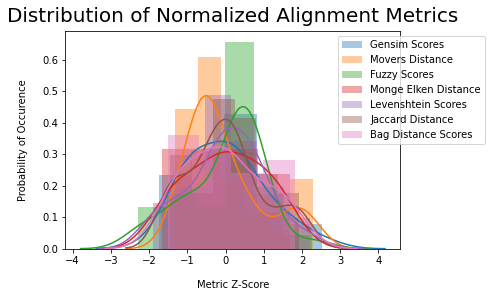

In [160]:
sns.distplot(scores['gensim_score_zscore'], label='Gensim Scores')
sns.distplot(scores['movers_distance_zscore'], label='Movers Distance') 
sns.distplot(scores['fuzzy_zscore'], label='Fuzzy Scores')
sns.distplot(scores['me_zscore'], label='Monge Elken Distance') 
sns.distplot(scores['lev_zscore'], label='Levenshtein Scores')
sns.distplot(scores['jaccard_zscore'], label='Jaccard Distance') 
sns.distplot(scores['bag_distance_zscore'], label='Bag Distance Scores')
#plt.axvline(x=height_leslie_inches, linestyle='--', linewidth=2.5, label="Leslie's height", c='indigo')
#plt.axvline(x=height_jamie_inches, linestyle='--', linewidth=2.5, label="Jamie's height", c='slategrey')
plt.xlabel("Metric Z-Score", labelpad=14)
plt.ylabel("Probability of Occurence", labelpad=14)
plt.title("Distribution of Normalized Alignment Metrics", y=1.015,
          fontsize=20) 
plt.legend(bbox_to_anchor=(0.8, 1));

In [161]:
zcols = ['gensim_score_zscore', 'movers_distance_zscore',
         'fuzzy_zscore', 'me_zscore', 'lev_zscore', 'jaccard_zscore',
         'bag_distance_zscore']

In [162]:
scores['alignment'] = ((scores[zcols].sum(axis=1)/7).abs()) *100  
pd.options.display.float_format = "{:,.2f}".format

It worked! The higher the alignment score (a sum of the standardized scores from seven different string distance metrics) the more closely aligned that states standards are to the NGSS standards. Future would strength this idea further by adding more metrics and examine additional mathematical methods for comparing dis similarly scaled items. 

In [163]:
comparison_df = scores.drop(['state', 'me_zscore', 'lev_zscore', 
                             'jaccard_zscore', 'bag_distance_zscore', 
                            'movers_distance_zscore'], axis=1)

In [164]:
#unpickle state dictionary
state_df_no_adopted = pd.read_pickle("Pickles/state_df_no_adopted.pkl") 
#transpose values
state_df_no_adopted = state_df_no_adopted.T  
state_df_no_adopted = state_df_no_adopted.reset_index() 
state_df_no_adopted

,index,update_year,standards
0,alabama,2015,aligned
1,alaska,2017,aligned
2,arizona,2018,aligned
3,colorado,2020,aligned
4,flordia,2008,independent
5,georgia,2016,aligned
6,idaho,2018,aligned
7,indiana,2016,aligned
8,louisiana,20202,aligned
9,mass,2016,aligned


In [165]:
comparison_df = comparison_df.merge(state_df_no_adopted, 
                                    left_on='statename', right_on='index', 
                                    how='left') 

In [166]:
comparison_df

,cluster,statename,gensim_score,movers_distance,fuzzy,me,lev,jaccard,bag_distance,gensim_score_zscore,fuzzy_zscore,alignment,index,update_year,standards
0,2,alabama,16,0.02,39,0.85,48,0.00,0.42,-0.86,0.13,43.96,alabama,2015,aligned
1,1,alaska,23,0.02,62,0.83,68,0.00,0.91,0.17,2.27,58.79,alaska,2017,aligned
2,2,arizona,27,0.02,30,0.79,58,0.00,0.23,0.76,-0.71,13.38,arizona,2018,aligned
3,1,colorado,14,0.02,48,0.82,54,0.00,0.81,-1.16,0.97,7.64,colorado,2020,aligned
4,0,flordia,17,0.03,43,0.72,62,0.00,0.60,-0.71,0.50,2.02,flordia,2008,independent
5,1,georgia,24,0.04,45,0.71,71,0.00,0.80,0.32,0.69,50.57,georgia,2016,aligned
6,2,idaho,22,0.02,44,0.73,60,0.00,0.40,0.02,0.60,20.15,idaho,2018,aligned
7,0,indiana,39,0.02,42,0.80,57,0.00,0.55,2.53,0.41,22.49,indiana,2016,aligned
8,1,louisiana,23,0.02,43,0.87,55,0.00,0.56,0.17,0.50,15.17,louisiana,20202,aligned
9,1,mass,18,0.02,45,0.80,64,0.00,0.98,-0.57,0.69,11.83,mass,2016,aligned


Score Cheat Sheet:  

Whole Corpus Metrics Used
1. Gensim: Rounded Percentage the larger the more similar the strings
2. Mover's Distance - Decimal calculation lower the more similar the strings  
3. Fuzzy String Matching - Decimal calculation the higher the more similar the strings 
4. Bag Distance - Decimal calculation the closer the score is to one the more similar the strings.

Partial Corpus Metrics Used 
1. Monge Elken - Decimal calculation the closer to one the more similar the strings  
2. Levenshtein - Decimal calculation the higher the more similar the strings 

In [167]:
comparison_df[comparison_df['standards'] == 'aligned']

,cluster,statename,gensim_score,movers_distance,fuzzy,me,lev,jaccard,bag_distance,gensim_score_zscore,fuzzy_zscore,alignment,index,update_year,standards
0,2,alabama,16,0.02,39,0.85,48,0.00,0.42,-0.86,0.13,43.96,alabama,2015,aligned
1,1,alaska,23,0.02,62,0.83,68,0.00,0.91,0.17,2.27,58.79,alaska,2017,aligned
2,2,arizona,27,0.02,30,0.79,58,0.00,0.23,0.76,-0.71,13.38,arizona,2018,aligned
3,1,colorado,14,0.02,48,0.82,54,0.00,0.81,-1.16,0.97,7.64,colorado,2020,aligned
5,1,georgia,24,0.04,45,0.71,71,0.00,0.80,0.32,0.69,50.57,georgia,2016,aligned
6,2,idaho,22,0.02,44,0.73,60,0.00,0.40,0.02,0.60,20.15,idaho,2018,aligned
7,0,indiana,39,0.02,42,0.80,57,0.00,0.55,2.53,0.41,22.49,indiana,2016,aligned
8,1,louisiana,23,0.02,43,0.87,55,0.00,0.56,0.17,0.50,15.17,louisiana,20202,aligned
9,1,mass,18,0.02,45,0.80,64,0.00,0.98,-0.57,0.69,11.83,mass,2016,aligned
11,0,minnesota,19,0.03,32,0.71,60,0.00,0.26,-0.42,-0.52,32.19,minnesota,2019,aligned


In [168]:
comparison_df[comparison_df['standards'] == 'independent']

,cluster,statename,gensim_score,movers_distance,fuzzy,me,lev,jaccard,bag_distance,gensim_score_zscore,fuzzy_zscore,alignment,index,update_year,standards
4,0,flordia,17,0.03,43,0.72,62,0.00,0.60,-0.71,0.50,2.02,flordia,2008,independent
10,2,michigan,27,0.03,19,0.79,51,0.00,0.12,0.76,-1.73,30.31,michigan,2015,independent
16,0,northcarolina,23,0.05,41,0.70,57,0.00,0.54,0.17,0.32,36.02,northcarolina,2004,independent
18,0,ohio,16,0.02,40,0.77,58,0.00,0.48,-0.86,0.22,37.41,ohio,2019,independent
20,0,pennsylvania,22,0.04,27,0.69,63,0.00,0.19,0.02,-0.99,12.00,pennsylvania,2002,independent
24,0,texas,32,0.02,40,0.78,62,0.00,0.45,1.50,0.22,12.87,texas,2017,independent
29,0,virginia,26,0.03,26,0.75,62,0.00,0.19,0.62,-1.08,20.91,virginia,2018,independent


In [169]:
scores_styled = pd.get_dummies(comparison_df,  
                               columns=['standards']).corr().sort_values('standards_aligned')

In [170]:
scores_styled[['standards_aligned', 'standards_independent']] \
                                .style.background_gradient(cmap="PiYG") 

,standards_aligned,standards_independent
standards_independent,-0.914853,1.000000
movers_distance,-0.471745,0.323538
gensim_score_zscore,-0.248555,0.118302
gensim_score,-0.248555,0.118302
lev,-0.166745,0.108738
jaccard,-0.019728,0.001471
alignment,0.243870,-0.154883
bag_distance,0.345973,-0.242365
fuzzy_zscore,0.363514,-0.199574
fuzzy,0.363514,-0.199574


Score Analysis: 

Gensim Score:  

There is no score greater than 39 which, out of 100, if fairly low but given it was a literal comparison 32% is significant. Over all the scores range from 13 - 39 with large overlap between the scores of the aligned and independent states. The highest scoring aligned state = Indiana. Most aligned 'independent' sates = Texas.


Movers Distance:  

The highest Mover's Distance Score is in North Carolina which is an independent state but the other movers states returned 0.02 - 0.04 scores (very low) and of a similar score range to the aligned state documents. The closest value 0.02 is very low and represents 16 of the aligned states and only one state in the independent category. It seems to be an accurate if not nuanced (at this rounding) score for alignment. Least aligned 'aligned' states = Wyoming, North Carolina, Georgia. Most aligned 'independent' states = Texas, Ohio


Fuzzy: 

The strongest match in the Fuzzy Wuzzy matching was Alaska with a score of 62, overall the aligned states did score higher than independent states but there are outliers in both categories. Montana (aligned) only scored a 15 on this metric and Florida (independent) scored 43. Ohio and Texas (independent) scored 40 on this metric which is in the main range (30 -50) of aligned state scores. 

Bag Distance: 

This is the widest ranging metric (0.12-0.98) so may be best suited for nuanced but large scope comparison between 
texts. Florida, North Carolina, and Texas (independent) all scored high in this metric as well but that seems to indicate a pattern rather than abnormalities at this point. In this metric Mass scores the highest of the aligned states, and many score in the 70 - 90 range. North Dakota and Missouri scored noticeably worse on this metric (mid teens range) which is much more in line with the other independent states.  


These are the whole text analysis metrics (unpacking and applying the partial metrics to the whole text would be appropriate in future work). 

Given this analysis there seems to be a greater variation in scores of the aligned states (they are more likely to score low on a metric and high on others) than the independent state scores. Across the board Alaska seems to be the highest consistently preforming state in the Aligned category. 

In the independent Florida, Texas and Ohio score remarkably well across the board indicating that they are more closely aligned to the NGSS standards than the label of independent would imply. 

In [171]:
just_alignment = comparison_df[['statename', 'alignment', 'standards']] 
just_alignment.style.apply(highlight_max, subset=['alignment'])

,statename,alignment,standards
0,alabama,43.958005,aligned
1,alaska,58.791508,aligned
2,arizona,13.378641,aligned
3,colorado,7.644839,aligned
4,flordia,2.023967,independent
5,georgia,50.565271,aligned
6,idaho,20.146166,aligned
7,indiana,22.492546,aligned
8,louisiana,15.168116,aligned
9,mass,11.831381,aligned


In this metric Utah is the highest aligned.

In [172]:
just_alignment.loc[just_alignment['standards'] == 'independent'] \
                            .style.apply(highlight_max, subset=['alignment'])

,statename,alignment,standards
4,flordia,2.023967,independent
10,michigan,30.309514,independent
16,northcarolina,36.019887,independent
18,ohio,37.413383,independent
20,pennsylvania,12.003233,independent
24,texas,12.874722,independent
29,virginia,20.914196,independent


Within just the independently aligned states Ohio is the most closely aligned state but Michigan and North Carolina are also aligned at above 30%.

# Conclusion

Natural Langauge Processing, Clustering and String Similarity scoring allow for effective quantification of the term 'alignment'. Once a quantification for the level of alignment two documents have is made it becomes easier to make data driven recommendations for actions. For example, a state like Alaska with an overall alignment score of 60% in their own aligned standards to the NGSS standards could choose to simply adopt the standards completely. Thus saving internal expense at updating and revising standards on a cyclical basis and gaining the benefits (both monetarily and in regards to reputation) of being a fully adopted state.

Conversely, the NGSS, a highly regarded organization with a vested interest in maintaining that respect could do an audit of those states claiming to be aligned to their values (thus representing the NGSS through their writing) and look at a state like Idaho with a very low alignment score of 9% and re-examine if it is in the best interest of the organization to allow the state to continue to claim to be aligned with them.

The implications of such a tool stretch far beyond state standards and could be applied to any organization seeking to become 'in line with' another organization or philosophy, and for those organizations to better understand the text associated groups are using in association with their name.